In [1]:
# %display latex

In [2]:
from IPython.display import display, Math, Latex

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

h = var("h")
a = var("a")

m = var("m")
psi_m = var("psi_m")

assume(kappa, "real")
assume(kappa > 0)

assume(z, "real")
assume(rh, "real")
assume(rh > 0)
assume(ph, "real")

assume(c, "real")
assume(c > 0)
assume(omega, "real")
assume(omega > 0)

assume(h, "real")
assume(h > 0)
assume(a, "real")
assume(a > 0)

assume(m, "real")
assume(m >= 0)
assume(psi_m, "real")

#Propulsion and Energy Forum
#July 28-30, 2014, Cleveland, OH
#50th AIAA/ASME/SAE/ASEE Joint Propulsion Conference
#Anomalous Thrust Production from an RF Test Device
#Measured on a Low-Thrust Torsion Pendulum
#David A. Brady * , Harold G. White † , Paul March ‡ , James T. Lawrence § , and Frank J. Davies **
#NASA Lyndon B. Johnson Space Center, Houston, Texas 77058


#Tapered Cavity RF Evaluation and Testing, TE012 mode
#Prior to the TM211 evaluations, COMSOL® analysis indicated that the TE012 was an effective thrust generation
#mode for the tapered cavity thruster being evaluated, so this mode was explored early in the evaluation process.
#Figure 22 shows a test run at the TE012 mode with an operating frequency of 1880.4 MHz. The measured quality
#factor was ~22,000, with a COMSOL prediction of 21,817. The measured power applied to the test article was
#measured to be 2.6 watts, and the (net) measured thrust was 55.4 micronewtons. With an input power of 2.6 watts,
#correcting for the quality factor, the predicted thrust is 50 micronewtons. However, since the TE012 mode had
#numerous other RF modes in very close proximity, it was impractical to repeatedly operate the system in this mode,
#so the decision was made to evaluate the TM211 modes instead.

#E. Tapered Cavity Testing: Summary of Results
# Mode 
# Frequency (MHz)
# Quality Factor, Q 

# Input Power (W) 
# Peak Thrust (μN) 
# Mean Thrust (μN) 
# Number of Test Runs
# TM211 1932.6   7320  16.9  116.0   91.2  5
# TM211 1936.7 18,100  16.7   54.1   50.1  2
# TE012 1880.4 22,000   2.6   55.4   55.4  1

m_val = 0
n_val = 0
h_val = 0

E_mode = False
n_layers = 3

a_val = 12

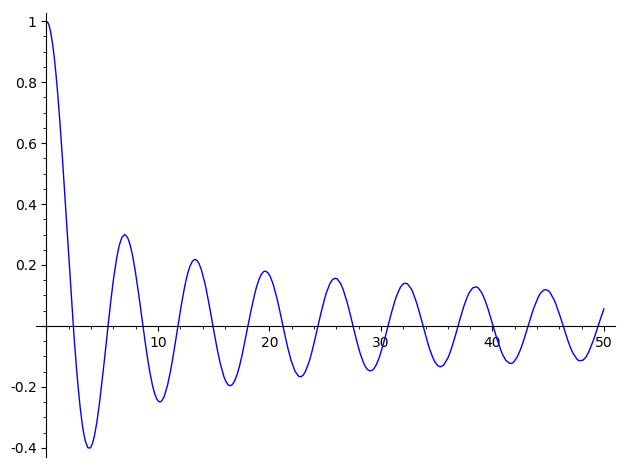

[2.404825557695772,
 5.520078110286311,
 8.653727912911013,
 11.791534439014281,
 14.930917708487819,
 18.071063967910924,
 21.21163662987927,
 24.352471530749302,
 27.493479132040253,
 30.634606468431976,
 33.77582021357357,
 36.917098353664045,
 40.0584257646282,
 43.19979171317673,
 46.34118837166201,
 49.48260989739783]

In [4]:
tol=0.000000000001
def find_root_recursive(func,a,b,tol=0.000000000001):
    try:
        free_variable = func.variables()[0]
    except:
        free_variable = x
    #print("free_variable", free_variable)
    #print("func", func(1))
    L = []
    if b - a < tol:
        return L
    try:
        #print ("a = ", a, "b = ", b)
        #print (func(free_variable=a), func(free_variable=b))
        x0 = find_root(func,a,b)
        #exec("print(func(" + preparse(str(free_variable)) + "=x0))")
        #print ("x0 =", x0, func(free_variable=x0))
        L.append(x0)
        L += find_root_recursive(func,a,x0-tol,tol)       
        L += find_root_recursive(func,x0+tol,b,tol)       
    except Exception as ex:
        #print(str(ex))
        #print ("a = ", a, "b = ", b)
        #print (func(free_variable=a), func(free_variable=b))
        #exec("print(func(" + preparse(str(free_variable)) + "=a))")
        #exec("print(func(" + preparse(str(free_variable)) + "=b))")
        pass
    return L

plot(bessel_J(m_val,x),0.1,50).show()
first_bessel_roots = find_root_recursive(bessel_J(m_val,x),0.1,50)
first_bessel_roots.sort()
first_bessel_roots

In [5]:
def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [6]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

In [7]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("assume(mu_" + str(i) + ", 'real')")
    exec("mu += [mu_" + str(i) +"]")

In [8]:
epsilon = []
for i in range(n_layers):
    exec("epsilon_" + str(i) + "= var('epsilon_" + str(i) + "')")
    exec("assume(epsilon_" + str(i) + ", 'real')")
    exec("epsilon += [epsilon_" + str(i) +"]")

In [9]:
sigma = []
for i in range(n_layers):
    exec("sigma_" + str(i) + "= var('sigma_" + str(i) + "')")
    exec("assume(sigma_" + str(i) + ", 'real')")
    exec("sigma += [sigma_" + str(i) +"]")

In [10]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("assume(A_z_" + str(i) + ", 'real')")
    exec("A_z += [A_z_" + str(i) +"]")

In [11]:
A_z

[A_z_0, A_z_1, A_z_2]

In [12]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("assume(B_z_" + str(i) + ", 'real')")
    exec("B_z += [B_z_" + str(i) +"]")

In [13]:
B_z

[B_z_0, B_z_1, B_z_2]

In [14]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("assume(k_" + str(i) + ", 'real')")
    exec("k += [k_" + str(i) +"]")

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c}\vec{j}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c} \sigma \vec{E}$


$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}  + \frac{4\pi}{c} \sigma \vec{E} \right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E} + \mu\,\frac{4\pi\,i\,\omega}{c^2} \sigma \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $


$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} rot\, \vec{E}  + \frac{4\pi}{c} \sigma rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\left(\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} + i\,\frac{4\pi\omega}{c^2} \sigma \right)\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$



In [15]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [16]:
E_rh = []
for i in range(n_layers):
    if E_mode:
        E_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * sin(m*ph + psi_m)]
    else:
        E_rh += [lambda rh,ph,z, i=i : I*m*omega*mu[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*ph + psi_m)]


In [17]:
E_ph = []
for i in range(n_layers):
    if E_mode:
        E_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph + psi_m)]
    else:
        E_ph += [lambda rh,ph,z, i=i : I*omega*mu[i]/(kappa) * bessel_J_d(m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]


In [18]:
E_z = []
for i in range(n_layers):
    if E_mode:
        E_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]
    else:
        E_z += [lambda rh,ph,z, i=i: 0]        

In [19]:
H_rh = []
for i in range(n_layers):
    if E_mode:
        H_rh += [lambda rh,ph,z, i=i : I*m*omega*epsilon[i]/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*ph + psi_m)]
    else:
        H_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * sin(m*ph + psi_m)]        

In [20]:
H_ph = []
for i in range(n_layers):
    if E_mode:
        H_ph += [lambda rh,ph,z, i=i : I*omega*epsilon[i]/(kappa*c) * bessel_J_d(m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]
    else:
        H_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph + psi_m)]

In [21]:
H_z = []
for i in range(n_layers):
    if E_mode:
        H_z += [lambda rh,ph,z, i=i : 0]
    else:
        H_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]                

In [22]:
E_rh[0](rh,ph,z)

-I*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*m*mu_0*omega*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*rho)

In [23]:
E_ph[0](rh,ph,z)

-1/2*I*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa

In [24]:
if 1 < n_layers:
    E_rh[1](rh,ph,z)

In [25]:
if 1 < n_layers:
    E_ph[1](rh,ph,z)

In [26]:
E_z[0](rh,ph,z)

0

In [27]:
if 1 < n_layers:
    E_z[1](rh,ph,z)

In [28]:
def Re(v):
    if sage.rings.integer.Integer == type(v):
        return v

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    if add_vararg != v_expanded.operator():
        return v.real_part()
    else:
        expand_real_operands = ()
        for s in v_expanded.operands():
            s_factor = s.factor()
            current_s_has_image_part = False
            if mul_vararg != s_factor.operator():
                return v.real_part()
            else:
                for m in s_factor.operands():
                    if bessel_J == m.operator():
                        pass
                    else:
                        if 0 != m.imag_part():
                            current_s_has_image_part = True
            if False == current_s_has_image_part:
                expand_real_operands += (s,)
        if 0 == len(expand_real_operands):
            return 0
        return (add_vararg(*expand_real_operands)).factor()

                            

def Im(v):
    if sage.rings.integer.Integer == type(v):
        return 0

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    if add_vararg != v_expanded.operator():
        return v.imag_part()
    else:
        expand_imag_operands = ()
        for s in v_expanded.operands():
            s_factor = s.factor()
            current_s_has_image_part = False
            if mul_vararg != s_factor.operator():
                return v.imag_part()
            else:
                for m in s_factor.operands():
                    if bessel_J == m.operator():
                        pass
                    else:
                        if 0 != m.imag_part():
                            current_s_has_image_part = True
            if True == current_s_has_image_part:
                expand_imag_operands += (s/I,)
        if 0 == len(expand_imag_operands):
            return 0
        return (add_vararg(*expand_imag_operands)).factor()



In [29]:
test_with_maxwell = True

In [30]:
def Preparse(s):
    s = s.replace('bessel_j', 'bessel_J')
    return preparse(s)

In [31]:
def test_with_maxwell_equations(i_layer):
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')
    
    E0 = ES.vector_field(
        E_rh[i_layer](rho,phi,zz),
        E_ph[i_layer](rho,phi,zz),
        E_z[i_layer](rho,phi,zz),
        name='E0')

    H0 = ES.vector_field(
        H_rh[i_layer](rho,phi,zz),
        H_ph[i_layer](rho,phi,zz),
        H_z[i_layer](rho,phi,zz),
        name='H0')

    from sage.manifolds.operators import curl
    rot_rot_E0 = curl(curl(E0))
    rot_rot_H0 = curl(curl(H0))
    
    print("rot_rot_E0 =", rot_rot_E0.display())
    print("rot_rot_H0 =", rot_rot_H0.display())
    
    mu_epsilon_omega2_c2_E0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * E0
    mu_epsilon_omega2_c2_H0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * H0
    
    print("mu_epsilon_omega2_c2_E0 =", mu_epsilon_omega2_c2_E0.display())
    print("mu_epsilon_omega2_c2_H0 =", mu_epsilon_omega2_c2_H0.display())
    
    eq_rot_rot_E = []
    eq_rot_rot_H = []
    for j in ES.irange():
        omega_2_subs =  solve(eq_kappa[i_layer], omega^2)
        omega_4_subs = [omega_2_subs[0].lhs()^2 == omega_2_subs[0].rhs()^2]
        if E_mode:
            exec("eq_rot_rot_E += [" + Preparse(str(( rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(((rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
        else:
            exec("eq_rot_rot_E += [" + Preparse(str(((rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(( rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            
    return (eq_rot_rot_E, eq_rot_rot_H)


In [32]:
if test_with_maxwell:
    (eq_rot_rot_E, eq_rot_rot_H) = test_with_maxwell_equations(i_layer = 0)

rot_rot_E0 = curl(curl(E0)) = -1/4*((4*I*A_z_0*m^3*mu_0*omega*bessel_j(m, kappa*rho)*cos(m*phi)*cos(psi_m) - 4*I*A_z_0*m^3*mu_0*omega*bessel_j(m, kappa*rho)*sin(m*phi)*sin(psi_m) + ((-I*A_z_0*kappa^2*m*bessel_j(m + 2, kappa*rho) - I*A_z_0*kappa^2*m*bessel_j(m - 2, kappa*rho) + (4*I*A_z_0*k_0^2 + 2*I*A_z_0*kappa^2)*m*bessel_j(m, kappa*rho))*mu_0*omega*cos(m*phi)*cos(psi_m) + (I*A_z_0*kappa^2*m*bessel_j(m + 2, kappa*rho) + I*A_z_0*kappa^2*m*bessel_j(m - 2, kappa*rho) + (-4*I*A_z_0*k_0^2 - 2*I*A_z_0*kappa^2)*m*bessel_j(m, kappa*rho))*mu_0*omega*sin(m*phi)*sin(psi_m))*rho^2 + ((2*I*A_z_0*kappa*m*bessel_j(m + 1, kappa*rho) - 2*I*A_z_0*kappa*m*bessel_j(m - 1, kappa*rho))*mu_0*omega*cos(m*phi)*cos(psi_m) + (-2*I*A_z_0*kappa*m*bessel_j(m + 1, kappa*rho) + 2*I*A_z_0*kappa*m*bessel_j(m - 1, kappa*rho))*mu_0*omega*sin(m*phi)*sin(psi_m))*rho)*cos(k_0*zz) + (4*I*B_z_0*m^3*mu_0*omega*bessel_j(m, kappa*rho)*cos(m*phi)*cos(psi_m) - 4*I*B_z_0*m^3*mu_0*omega*bessel_j(m, kappa*rho)*sin(m*phi)*sin(psi_m) 

In [33]:
if test_with_maxwell:
    print(eq_rot_rot_E)

[1/4*(kappa^2*rho^2*bessel_J(m + 2, kappa*rho) + kappa^2*rho^2*bessel_J(m - 2, kappa*rho) + 2*kappa^2*rho^2*bessel_J(m, kappa*rho) - 2*kappa*rho*bessel_J(m + 1, kappa*rho) + 2*kappa*rho*bessel_J(m - 1, kappa*rho) - 4*m^2*bessel_J(m, kappa*rho))*(k_0^2 + kappa^2)*(A_z_0*cos(k_0*zz) + B_z_0*sin(k_0*zz))*(cos(m*phi)*cos(psi_m) - sin(m*phi)*sin(psi_m))*c*m/(epsilon_0*kappa^2*rho^3) == 0, 1/8*(kappa^3*rho^3*bessel_J(m + 3, kappa*rho) + kappa^3*rho^3*bessel_J(m + 1, kappa*rho) - kappa^3*rho^3*bessel_J(m - 1, kappa*rho) - kappa^3*rho^3*bessel_J(m - 3, kappa*rho) - 2*kappa^2*rho^2*bessel_J(m + 2, kappa*rho) - 4*kappa*m^2*rho*bessel_J(m + 1, kappa*rho) + 4*kappa*m^2*rho*bessel_J(m - 1, kappa*rho) - 2*kappa^2*rho^2*bessel_J(m - 2, kappa*rho) + 4*kappa^2*rho^2*bessel_J(m, kappa*rho) - 4*kappa*rho*bessel_J(m + 1, kappa*rho) + 4*kappa*rho*bessel_J(m - 1, kappa*rho) - 16*m^2*bessel_J(m, kappa*rho))*(k_0^2 + kappa^2)*(A_z_0*cos(k_0*zz) + B_z_0*sin(k_0*zz))*(cos(psi_m)*sin(m*phi) + cos(m*phi)*sin(psi_

In [34]:
if test_with_maxwell:
    if E_mode:
        eq_rot_rot_Ez = (eq_rot_rot_E[2])
        display(Math(latex(eq_rot_rot_Ez)))

In [35]:
if test_with_maxwell:
    if E_mode:
        display(Math(latex(eq_rot_rot_Ez.lhs().numerator().operands()[0])))

In [36]:
if test_with_maxwell:
    if E_mode:
        print(eq_rot_rot_Ez.lhs().numerator().operands()[0].variables())

In [37]:
if test_with_maxwell:
    if E_mode:
        plot(eq_rot_rot_Ez.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [38]:
if test_with_maxwell:
    if not E_mode:
        eq_rot_rot_Erh = (eq_rot_rot_E[0])
        display(Math(latex(eq_rot_rot_Erh)))

<IPython.core.display.Math object>

In [39]:
if test_with_maxwell:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Erh.lhs().numerator().operands()[0])))

<IPython.core.display.Math object>

In [40]:
if test_with_maxwell:
    if not E_mode:
        print(eq_rot_rot_Erh.lhs().numerator().operands()[0].variables())

(kappa, m, rho)


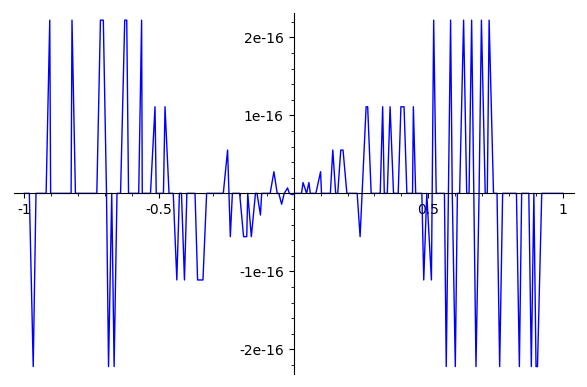

In [41]:
if test_with_maxwell:
    if not E_mode:
        plot(eq_rot_rot_Erh.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [42]:
if test_with_maxwell:
    if not E_mode:
        eq_rot_rot_Eph = (eq_rot_rot_E[1])
        display(Math(latex(eq_rot_rot_Eph)))

<IPython.core.display.Math object>

In [43]:
if test_with_maxwell:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Eph.lhs().numerator().operands()[0])))

<IPython.core.display.Math object>

In [44]:
if test_with_maxwell:
    if not E_mode:
        print(eq_rot_rot_Eph.lhs().numerator().operands()[0].variables())

(kappa, m, rho)


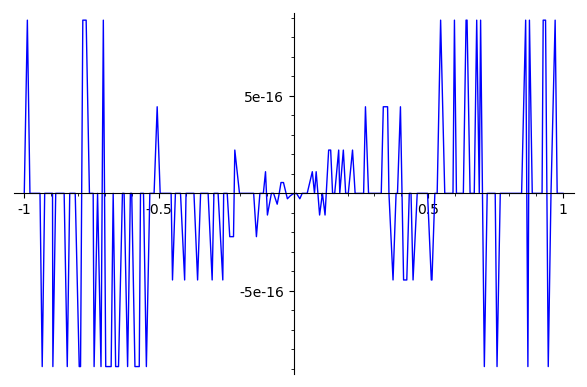

In [45]:
if test_with_maxwell:
    if not E_mode:
        plot(eq_rot_rot_Eph.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [46]:
if test_with_maxwell:
    display(Math(latex(eq_rot_rot_H)))

<IPython.core.display.Math object>

In [47]:
if test_with_maxwell:
    if E_mode:
        eq_rot_rot_Hrh = (eq_rot_rot_H[0])
        display(Math(latex(eq_rot_rot_Hrh)))

In [48]:
if test_with_maxwell:
    if E_mode:
        eq_rot_rot_Hph = (eq_rot_rot_H[1])
        display(Math(latex(eq_rot_rot_Hph)))

In [49]:
if test_with_maxwell:
    if E_mode:
        print(eq_rot_rot_Hrh.lhs().operator())

In [50]:
if test_with_maxwell:
    if E_mode:
        print(eq_rot_rot_Hph.lhs().operator())

In [51]:
if test_with_maxwell:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hrh.lhs().operands()[0])))

In [52]:
if test_with_maxwell:
    if E_mode:
        plot(eq_rot_rot_Hrh.lhs().operands()[0].subs(kappa==1, m == 1, psi_m == pi/2), rh).show()

In [53]:
if test_with_maxwell:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hph.lhs().operands()[0])))

In [54]:
if test_with_maxwell:
    if E_mode:
        plot(eq_rot_rot_Hph.lhs().operands()[0].subs(kappa==1, m == 1, psi_m == pi/2), rh).show()

In [55]:
if test_with_maxwell:
    if not E_mode:
        eq_rot_rot_Hz = (eq_rot_rot_H[2])
        display(Math(latex(eq_rot_rot_Hz)))

<IPython.core.display.Math object>

In [56]:
if test_with_maxwell:
    if not E_mode:
        print(eq_rot_rot_Hz.lhs().operator())

<function mul_vararg at 0x7fcbe68dbc20>


In [57]:
if test_with_maxwell:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Hz.lhs().operands()[0])))

<IPython.core.display.Math object>

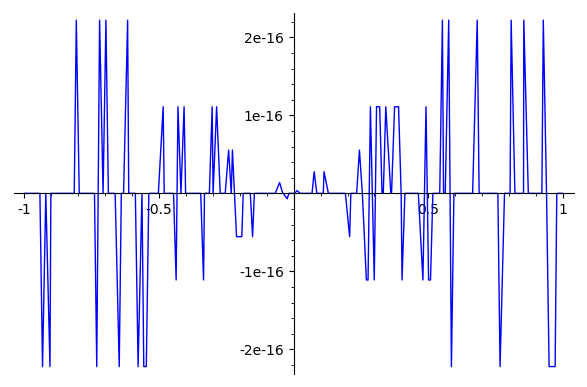

In [58]:
if test_with_maxwell:
    if not E_mode:
        plot(eq_rot_rot_Hz.lhs().operands()[0].subs(kappa==1, m == 1, psi_m == pi/2), rh).show()

In [59]:
rotE_rh = []
for i in range(n_layers):
    exec(preparse("rotE_rh += [lambda rh,ph,z, i=i: " + str(diff(E_z[i](rh,ph,z),ph)/rh - E_ph[i](rh,ph,z).diff(z)) +"]"))

In [60]:
rotE_ph = []
for i in range(n_layers):
    exec(preparse("rotE_ph += [lambda rh,ph,z, i=i: " + str(E_rh[i](rh,ph,z).diff(z)-diff(E_z[i](rh,ph,z),rh)) +"]"))

In [61]:
rotE_z = []
for i in range(n_layers):
    exec(preparse("rotE_z += [lambda rh,ph,z, i=i: " + str(((rh*E_ph[i](rh,ph,z)).diff(rh) - E_rh[i](rh,ph,z).diff(ph))/rh) +"]"))

In [62]:
rotE_ph[0](rh,ph,z)

(-I*B_z_0*k_0*cos(k_0*z) + I*A_z_0*k_0*sin(k_0*z))*m*mu_0*omega*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*rho)

In [63]:
if 1 < n_layers:
    rotE_ph[1](rh,ph,z)

In [64]:
rotE_rh[0](rh,ph,z)

-1/2*(-I*B_z_0*k_0*cos(k_0*z) + I*A_z_0*k_0*sin(k_0*z))*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa

In [65]:
rotE_z[0](rh,ph,z)

-1/4*((-I*kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) - I*kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*mu_0*omega*rho*sin(m*varphi + psi_m)/kappa + (2*I*A_z_0*cos(k_0*z) + 2*I*B_z_0*sin(k_0*z))*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa + (4*I*A_z_0*cos(k_0*z) + 4*I*B_z_0*sin(k_0*z))*m^2*mu_0*omega*bessel_J(m, kappa*rho)*sin(m*varphi + psi_m)/(kappa^2*rho))/rho

In [66]:
H_rh_ = []
for i in range(n_layers):
    H_rh_ += [lambda rh,ph,z, i=i : rotE_rh[i](rh,ph,z)*c/(I*omega *mu[i])]

In [67]:
H_ph_ = []
for i in range(n_layers):
    H_ph_ += [lambda rh,ph,z, i=i : rotE_ph[i](rh,ph,z)*c/(I*omega *mu[i])]

In [68]:
H_z_ = []
for i in range(n_layers):
    H_z_ += [lambda rh,ph,z, i=i : rotE_z[i](rh,ph,z)*c/(I*omega *mu[i])]

In [69]:
H_rh_[0](rh,ph,z).factor()

1/2*(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*c*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa

In [70]:
if 1 < n_layers:
    H_rh_[1](rh,ph,z)

In [71]:
display(Math(latex(H_ph[0](rh,ph,z).factor())))

<IPython.core.display.Math object>

In [72]:
H_ph_[0](rh,ph,z).subs(m == 0, B_z[0] == 0)

0

In [73]:
if 1 < n_layers:
    H_ph_[1](rh,ph,z)

In [74]:
H_z_[0](rh,ph,z)

1/4*I*((-I*kappa*(bessel_J(m + 2, kappa*rho) - bessel_J(m, kappa*rho)) - I*kappa*(bessel_J(m - 2, kappa*rho) - bessel_J(m, kappa*rho)))*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*mu_0*omega*rho*sin(m*varphi + psi_m)/kappa + (2*I*A_z_0*cos(k_0*z) + 2*I*B_z_0*sin(k_0*z))*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa + (4*I*A_z_0*cos(k_0*z) + 4*I*B_z_0*sin(k_0*z))*m^2*mu_0*omega*bessel_J(m, kappa*rho)*sin(m*varphi + psi_m)/(kappa^2*rho))*c/(mu_0*omega*rho)

In [75]:
if 1 < n_layers:
    H_z_[1](rh,ph,z)

In [76]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rh[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rh[n_layers - 1](rh,ph,h*n_layers) == 0.0]

eq_Eph_superconductor_boundary_conditions = []
eq_Eph_superconductor_boundary_conditions += [E_ph[0](rh,ph,0) == 0.0]
eq_Eph_superconductor_boundary_conditions += [E_ph[n_layers - 1](rh,ph,h*n_layers) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Eph_superconductor_boundary_conditions)))

if E_mode:
    var_begin = B_z[0]
    var_end   = B_z[n_layers - 1]
else:
    var_begin = A_z[0]
    var_end   = A_z[n_layers - 1]

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], var_begin)
boundary_Erh_subs_end   = solve(eq_Erh_superconductor_boundary_conditions[1], var_end)

boundary_Eph_subs_begin = solve(eq_Eph_superconductor_boundary_conditions[0], var_begin)
boundary_Eph_subs_end   = solve(eq_Eph_superconductor_boundary_conditions[1], var_end)

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Eph_subs_begin)))
display(Math(latex(boundary_Eph_subs_end)))

boundary_conductor = boundary_Erh_subs_begin + boundary_Erh_subs_end
#boundary_conductor += boundary_Eph_subs_begin + boundary_Eph_subs_end
display(Math(latex(boundary_conductor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [77]:
E_rho = []
for i in range(n_layers):
    exec(preparse("E_rho += [ lambda rh, ph, z, i=i : " + str(E_rh[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [78]:
E_phi = []
for i in range(n_layers):
    exec(preparse("E_phi += [ lambda rh, ph, z, i=i : " + str(E_ph[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [79]:
E_zz = []
for i in range(n_layers):
    exec(preparse("E_zz += [ lambda rh, ph, z, i=i : " + str(E_z[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [80]:
H_rho = []
for i in range(n_layers):
    exec(preparse("H_rho += [ lambda rh, ph, z, i=i : " + str(H_rh[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [81]:
H_phi = []
for i in range(n_layers):
    exec(preparse("H_phi += [ lambda rh, ph, z, i=i : " + str(H_ph[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [82]:
H_zz = []
for i in range(n_layers):
    exec(preparse("H_zz += [ lambda rh, ph, z, i=i : " + str(H_z[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [83]:
if 0 < n_layers:
    display(Math(latex(E_rh[0](rh,ph,z))))
    display(Math(latex(E_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [84]:
if 1 < n_layers:
    display(Math(latex(E_rh[1](rh,ph,z))))
    display(Math(latex(E_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [85]:
if 2 < n_layers:
    display(Math(latex(E_rh[2](rh,ph,z))))
    display(Math(latex(E_rho[2](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [86]:
if 0 < n_layers:
    display(Math(latex(E_z[0](rh,ph,z))))
    display(Math(latex(E_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [87]:
if 1 < n_layers:
    display(Math(latex(E_z[1](rh,ph,z))))
    display(Math(latex(E_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [88]:
if 2 < n_layers:
    display(Math(latex(E_z[2](rh,ph,z))))
    display(Math(latex(E_zz[2](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [89]:
if 0 < n_layers:
    display(Math(latex(H_rh[0](rh,ph,z))))
    display(Math(latex(H_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [90]:
if 1 < n_layers:
    display(Math(latex(H_rh[1](rh,ph,z))))
    display(Math(latex(H_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [91]:
if 2 < n_layers:
    display(Math(latex(H_rh[2](rh,ph,z))))
    display(Math(latex(H_rho[2](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [92]:
if 0 < n_layers:
    display(Math(latex(H_ph[0](rh,ph,z))))
    display(Math(latex(H_phi[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [93]:
if 1 < n_layers:
    display(Math(latex(H_ph[1](rh,ph,z))))
    display(Math(latex(H_phi[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [94]:
if 2 < n_layers:
    display(Math(latex(H_ph[2](rh,ph,z))))
    display(Math(latex(H_phi[2](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [95]:
if 0 < n_layers:
    display(Math(latex(H_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

In [96]:
if 1 < n_layers:
    display(Math(latex(H_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

In [97]:
if 2 < n_layers:
    display(Math(latex(H_zz[2](rh,ph,z))))

<IPython.core.display.Math object>

In [98]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [99]:
all_vars = []
for i in range(n_layers):
    all_vars += [A_z[i], B_z[i]]
    
all_vars

[A_z_0, B_z_0, A_z_1, B_z_1, A_z_2, B_z_2]

In [100]:
def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    #for row in M_rows:
    #    print("row =")
    #    display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        #print ("M_rows[", r, "] =")
        #display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    #if reduced_M.nrows() == reduced_M.ncols():
        #reduced_M_det = reduced_M.det()
        #print ("")
        #print ("reduced_M.det() =")
        #display(Math(latex(reduced_M_det)))
    return reduced_M

In [101]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    # print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    # display(Math(latex(eqns)))
    return (eqns)

In [102]:
bch = []
bc =  []
for i  in range (n_layers-1):
    if E_mode:
        bc += [(E_rho[i](rh,ph, (i + 1) * h) == E_rho[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(E_phi[i](rh,ph, (i + 1) * h) == E_phi[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(epsilon[i] * E_z[i](rh,ph,(i+1)*h) == epsilon[i+1]*E_z[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bch += [(H_phi [i](rh,ph,(i+1)*h) == H_phi [i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
    else:
        bc += [(H_rho[i](rh,ph, (i + 1) * h) == H_rho[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(H_phi[i](rh,ph, (i + 1) * h) == H_phi[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(mu[i] * H_z[i](rh,ph,(i+1)*h) == mu[i+1]*H_z[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bch += [(E_phi [i](rh,ph,(i+1)*h) == E_phi [i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]

In [103]:
display(Math(latex(bc)))

<IPython.core.display.Math object>

In [104]:
bch

[-1/2*I*B_z_0*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(h*k_0)*sin(m*varphi + psi_m)/kappa == -1/2*(I*A_z_1*cos(h*k_1) + I*B_z_1*sin(h*k_1))*mu_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa,
 -1/2*(I*A_z_1*cos(2*h*k_1) + I*B_z_1*sin(2*h*k_1))*mu_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa == -1/2*(-I*B_z_2*cos(2*h*k_2)*sin(3*h*k_2)/cos(3*h*k_2) + I*B_z_2*sin(2*h*k_2))*mu_2*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa]

In [105]:
all_eqs = bc \
        + boundary_conductor

#display(Math(latex(all_eqs)))

In [106]:
M = GenerateMatrix(all_eqs, all_vars)

In [107]:
display(Math(latex(M)))

<IPython.core.display.Math object>

In [108]:
M.nrows(), M.ncols(), len(all_vars)

(8, 6, 6)

In [109]:
M.rank()

6

In [110]:
reduced_M = reduceDependedRows(M)


M.nrows() 8
M.ncols() 6
M.rank() 6
M.pivot_rows() = (0, 2, 3, 5, 6, 7)


In [111]:
reduced_M.nrows(), reduced_M.ncols(),

(6, 6)

In [112]:
reduced_M.pivots()

(0, 1, 2, 3, 4, 5)

In [113]:
def reduceEmptyCols(M, vars):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())
    print ("len(vars)", len(vars))

    M_pivots = M.pivots()
    print ("M.pivots() =", M_pivots)
    
    M_transposed = M.transpose()

    M_cols = M_transposed.rows()
    #for col in M_cols:
    #    print("col =")
    #    display(Math(latex(col)))

    reduced_list = []
    reduced_vars = []
    for c in M_pivots:
        #print ("M_cols[", c, "] =")
        #display(Math(latex(M_cols[c])))
        reduced_list.append(M_cols[c])
        reduced_vars.append(vars[c])

    reduced_M_transposed = matrix(SR, len(M_pivots), M.nrows(), reduced_list)
    return reduced_vars, reduced_M_transposed.transpose()

In [114]:
reduced_vars, reduced_reduced_M = reduceEmptyCols(reduced_M, all_vars)


M.nrows() 6
M.ncols() 6
M.rank() 6
len(vars) 6
M.pivots() = (0, 1, 2, 3, 4, 5)


In [115]:
reduced_reduced_M.nrows(), reduced_reduced_M.ncols(), len(reduced_vars)

(6, 6, 6)

In [116]:
reduced_vars

[A_z_0, B_z_0, A_z_1, B_z_1, A_z_2, B_z_2]

In [117]:
display(Math(latex(reduced_reduced_M)))

<IPython.core.display.Math object>

In [118]:
reduced_reduced_M

[                                                                                                                                                    0                                             -1/2*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*sin(m*varphi + psi_m)/kappa                                             -1/2*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(h*k_1)*sin(m*varphi + psi_m)/kappa                                              1/2*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_1)*sin(m*varphi + psi_m)/kappa                                                                                                                                                     0                                                                                                                                                     0]
[                                                                                                 

In [119]:
type(reduced_reduced_M)

<class 'sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense'>

In [120]:
reduced_reduced_M.det()

1/4*k_1*k_2*mu_0*mu_1*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4/kappa^2 - 1/2*k_1*k_2*mu_0*mu_1*bessel_j(m + 1, kappa*rho)*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4/kappa^2 + 1/4*k_1*k_2*mu_0*mu_1*bessel_j(m - 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4/kappa^2 + 1/4*k_0*k_2*mu_1^2*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4/kappa^2 - 1/2*k_0*k_2*mu_1^2*bessel_j(m + 1, kappa*rho)*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4/kappa^2 + 1/4*k_0*k_2*mu_1^2*bessel_j(m - 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4/kappa^2 - 1/4*k_0*k_2

In [121]:
exec("reduced_reduced_M_det = " + Preparse(str(reduced_reduced_M.det())))

In [122]:
display(Math(latex(reduced_reduced_M_det)))

<IPython.core.display.Math object>

In [123]:
reduced_reduced_M_det

1/4*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4/kappa^2 - 1/2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4/kappa^2 + 1/4*k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4/kappa^2 + 1/4*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4/kappa^2 - 1/2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4/kappa^2 + 1/4*k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4/kappa^2 - 1/4*k_0*k_2

In [124]:
M_det  = reduced_reduced_M_det

In [125]:
M_det

1/4*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4/kappa^2 - 1/2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4/kappa^2 + 1/4*k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4/kappa^2 + 1/4*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4/kappa^2 - 1/2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4/kappa^2 + 1/4*k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4/kappa^2 - 1/4*k_0*k_2

In [126]:
# display(Math(latex(M_det)))

In [127]:
M_det_num = M_det.numerator()

In [128]:
M_det_num

k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4 - 2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4 + k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4 + k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4 - 2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4 + k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4 - k

In [129]:
M_det_num.variables()

(h, k_0, k_1, k_2, kappa, m, mu_0, mu_1, mu_2, psi_m, rho, varphi)

In [130]:
M_det.full_simplify().numerator()

-k_1*k_2*mu_0*mu_1*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_1)*cos(h*k_2)*cos(psi_m)^4*sin(h*k_0)*sin(m*varphi)^4 + 2*k_1*k_2*mu_0*mu_1*bessel_j(m + 1, kappa*rho)*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)^2*cos(h*k_1)*cos(h*k_2)*cos(psi_m)^4*sin(h*k_0)*sin(m*varphi)^4 - k_1*k_2*mu_0*mu_1*bessel_j(m - 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_1)*cos(h*k_2)*cos(psi_m)^4*sin(h*k_0)*sin(m*varphi)^4 - k_0*k_2*mu_1^2*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_2)*cos(psi_m)^4*sin(h*k_1)*sin(m*varphi)^4 + 2*k_0*k_2*mu_1^2*bessel_j(m + 1, kappa*rho)*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_2)*cos(psi_m)^4*sin(h*k_1)*sin(m*varphi)^4 - k_0*k_2*mu_1^2*bessel_j(m - 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_2)*cos(psi_m)^4*sin(h*k_1)*sin(m*varphi)^4 - k_0*k_1*mu_1*mu_2*bessel_j(m + 1, kappa*rho)^2*bessel_j(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(psi_m)^4*sin(h*k_2)*sin(m*varphi)^4 + 2*

In [131]:
M_det_num_expand = M_det_num.expand()

In [132]:
M_det_num_expand.operator()

<function add_vararg at 0x7fcbe7d4ef80>

In [133]:
for operand in M_det_num_expand.operands():
    print (operand)
    print ("")

k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4

-2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4

k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4

k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4

-2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4

k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4

-k_0*

In [134]:
M_det_num

k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4 - 2*k_1*k_2*mu_0*mu_1*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4 + k_1*k_2*mu_0*mu_1*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(m*varphi + psi_m)^4 + k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4 - 2*k_0*k_2*mu_1^2*bessel_J(m + 1, kappa*rho)*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4 + k_0*k_2*mu_1^2*bessel_J(m - 1, kappa*rho)^2*bessel_J(m, kappa*rho)^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1)*sin(m*varphi + psi_m)^4 - k

In [135]:
M_det_num_factor = M_det_num.factor()
M_det_num_factor

(k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)

In [136]:
M_det_num_factor.operator()

<function mul_vararg at 0x7fcbe68dbc20>

In [137]:
M_det_num_factor.operands()

[k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)

In [138]:
M_det_num_factor_operands = ()
for operand in M_det_num_factor.operands():
    print (operand)
    print (operand.variables())
    if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        exec("M_det_num_factor_operands += (" + Preparse(str(operand)) + ",)")
    print ("")
    
M_det_num_factor_operands

k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*

(k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)

In [139]:
M_det_num_factor_operands

(k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0) + k_0*k_2*mu_1^2*cos(h*k_0)*cos(h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(2*h*k_1) - k_0*k_2*mu_1^2*cos(h*k_0)*cos(2*h*k_1)*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_1) + k_1*k_2*mu_0*mu_1*cos(3*h*k_2)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(2*h*k_2)*sin(3*h*k_2) - k_1^2*mu_0*mu_2*cos(h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(3*h*k_2) + k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(2*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(3*h*k_2) + k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(3*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(2*h*k_1)*cos(h*k_1)*cos(3*h*k_2)*sin(2*h*k_2) + k_1^2*mu_0*mu_2*cos(h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(2*h*k_1)*sin(2*h*k_2) - k_1^2*mu_0*mu_2*cos(2*h*k_1)*cos(3*h*k_2)*sin(h*k_0)*sin(h*k_1)*sin(2*h*k_2) - k_0*k_1*mu_1*mu_2*cos(h*k_0)*cos(3*h*k_2)*sin(2*h*k_1)*sin(h*k_1)*sin(2*h*k_2) + k_1*k_2*mu_0*mu_1*cos(2*h*k_1)*cos(h*k_1)

In [140]:
from sage.symbolic.operators import add_vararg, mul_vararg
M_det_num = mul_vararg(*M_det_num_factor_operands)

In [141]:
display(Math(latex(M_det_num.factor())))

<IPython.core.display.Math object>

In [142]:
M_det_num.variables()

(h, k_0, k_1, k_2, mu_0, mu_1, mu_2)

In [143]:
for i in range(n_layers):
    M_det_num = (M_det_num/(k [i]*sin(h*k[i]))).full_simplify().expand()

In [144]:
M_det_num

-k_1*mu_0*mu_2/(k_0*k_2) + mu_1*mu_2*cos(h*k_0)*cos(h*k_1)/(k_2*sin(h*k_0)*sin(h*k_1)) + mu_1^2*cos(h*k_0)*cos(h*k_2)/(k_1*sin(h*k_0)*sin(h*k_2)) + mu_0*mu_1*cos(h*k_1)*cos(h*k_2)/(k_0*sin(h*k_1)*sin(h*k_2))

In [145]:
disp_eq = M_det_num == 0

In [146]:
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [147]:
bch

[-1/2*I*B_z_0*mu_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(h*k_0)*sin(m*varphi + psi_m)/kappa == -1/2*(I*A_z_1*cos(h*k_1) + I*B_z_1*sin(h*k_1))*mu_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa,
 -1/2*(I*A_z_1*cos(2*h*k_1) + I*B_z_1*sin(2*h*k_1))*mu_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa == -1/2*(-I*B_z_2*cos(2*h*k_2)*sin(3*h*k_2)/cos(3*h*k_2) + I*B_z_2*sin(2*h*k_2))*mu_2*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa]

In [148]:
display(Math(latex(bch)))

<IPython.core.display.Math object>

In [149]:
bchs = []
for i in range(n_layers-1):
    if E_mode:
        bchs +=  [solve (bch[i].subs(solve (bc[0], B_z[1])), A_z[i+1])[0].full_simplify ().factor () ]
    else:
        bchs +=  [solve (bch[i].subs(solve (bc[0], A_z[1])), B_z[i+1])[0].full_simplify ().factor () ]
bchs.reverse()

In [150]:
display(Math(latex(bchs)))

<IPython.core.display.Math object>

In [151]:
bcs = []
for i in range(n_layers-1):
    if E_mode:
        bcs +=  solve (bc[3*i], B_z[i+1])
    else:
        bcs +=  solve (bc[3*i], A_z[i+1])
bcs

[A_z_1 == -(B_z_0*k_0*cos(h*k_0) - B_z_1*k_1*cos(h*k_1))/(k_1*sin(h*k_1))]

In [152]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda rh, ph, z, i=i : E_rho[i](rh,ph,z).subs(bcs).subs(bchs).subs(bchs) ]

In [153]:
E_phi_s = []
for i in range(n_layers):
    E_phi_s += [ lambda rh, ph, z, i=i : E_phi[i](rh,ph,z).subs(bcs).subs(bchs).subs(bchs) ]

In [154]:
E_z_s = []
for i in range(n_layers):
    E_z_s += [ lambda rh, ph, z, i=i : E_zz[i](rh,ph,z).subs(bcs).subs(bchs).subs(bchs) ]

In [155]:
H_rho_s = []
for i in range(n_layers):
    H_rho_s += [ lambda rh, ph, z, i=i : H_rho[i](rh,ph,z).subs(bcs).subs(bchs).subs(bchs) ]

In [156]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda rh, ph, z, i=i : H_phi[i](rh,ph,z).subs(bcs).subs(bchs).subs(bchs) ]

In [157]:
H_z_s = []
for i in range(n_layers):
    H_z_s += [ lambda rh, ph, z, i=i : H_zz[i](rh,ph,z).subs(bcs).subs(bchs).subs(bchs) ]

In [158]:
if 0 < n_layers:
    display(Math(latex(E_rho_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [159]:
if 1 < n_layers:
    display(Math(latex(E_rho_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [160]:
if 2 < n_layers:
    display(Math(latex(E_rho_s [2](rh,ph,z))))

<IPython.core.display.Math object>

In [161]:
if 0 < n_layers:
    display(Math(latex(E_phi_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [162]:
if 1 < n_layers:
    display(Math(latex(E_phi_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [163]:
if 2 < n_layers:
    display(Math(latex(E_phi_s [2](rh,ph,z))))

<IPython.core.display.Math object>

In [164]:
if 0 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[0](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [165]:
if 1 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[1](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [166]:
if 2 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[2](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[2](rh,ph,z))))

<IPython.core.display.Math object>

In [167]:
if 0 < n_layers:
    display(Math(latex(H_rho_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [168]:
if 1 < n_layers:
    display(Math(latex(H_rho_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [169]:
if 2 < n_layers:
    display(Math(latex(H_rho_s[2](rh,ph,z))))

<IPython.core.display.Math object>

In [170]:
if 0 < n_layers:
    display(Math(latex(H_phi_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [171]:
if 1 < n_layers:
    display(Math(latex(H_phi_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [172]:
if 2 < n_layers:
    display(Math(latex(H_phi_s[2](rh,ph,z))))

<IPython.core.display.Math object>

In [173]:
eq_kappa

[-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2,
 -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2,
 -k_2^2 + epsilon_2*mu_2*omega^2/c^2 == kappa^2]

In [174]:
disp_eq

-k_1*mu_0*mu_2/(k_0*k_2) + mu_1*mu_2*cos(h*k_0)*cos(h*k_1)/(k_2*sin(h*k_0)*sin(h*k_1)) + mu_1^2*cos(h*k_0)*cos(h*k_2)/(k_1*sin(h*k_0)*sin(h*k_2)) + mu_0*mu_1*cos(h*k_1)*cos(h*k_2)/(k_0*sin(h*k_1)*sin(h*k_2)) == 0

In [175]:
bessel_root_1 = first_bessel_roots[n_val]
bessel_root_1

2.404825557695772

In [176]:
kappa_d1 = bessel_root_1/a

In [177]:
#sgs
# https://iopscience.iop.org/article/10.1149/1.2113993/pdf
# DC and ac electrical conductivities of silicon dioxide thermally grown on p‐ (boron‐doped) and n‐type (phosphorous‐doped) silicon have been measured in the temperature range of 25°–1100°C. 
# Total dc conductivities varied from 10−9 to 10−16 Ω−1cm−1
# sigma_sgse = 9*10^9 * sigma_SI

# https://technoinfo.ru/catalog/napylenie-oksida-titana-tio2/
lambda_d = 632*100*10^-9
# 632 nm
digit_values = [m == m_val, a == a_val, mu[0] == 1,  epsilon[0] == 2.468^2, sigma[0] == 9*10^9 * 10 ^-9]
if 1 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-alyuminiya-al2o3/
    digit_values += [mu[1] == 1, epsilon[1] == 1.67^2, sigma[1] == 9*10^9 * 10 ^-9]
    
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    # digit_values += [mu[1] == 1, epsilon[1] == 1.487^2]
    
if 2 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[2] == 1, epsilon[2] == 1.487^2, sigma[2] == 9*10^9 * 10 ^-9]
c_value  = [ c == 299792458 * 100]

omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]
print(omega_value[0].rhs().n())

2.98046134067856e15


In [178]:
epsilon_d = []
mu_d = []

for i in range(n_layers):
    epsilon_d += [epsilon[i].subs(digit_values)]
    mu_d      += [mu[i].subs(digit_values)]

In [179]:
eq_kappa_d = []
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs (c_value).subs(omega_value)]

In [180]:
eq_kappa_d

[6.09980772312129e9*pi^2 - k_0^2 == 0.040161013631574864,
 2.79292180740266e9*pi^2 - k_1^2 == 0.040161013631574864,
 2.21435767505208e9*pi^2 - k_2^2 == 0.040161013631574864]

In [181]:
disp_eq_d = disp_eq.subs(digit_values).subs (c_value)

In [182]:
disp_eq_d

-k_1/(k_0*k_2) + cos(h*k_0)*cos(h*k_1)/(k_2*sin(h*k_0)*sin(h*k_1)) + cos(h*k_0)*cos(h*k_2)/(k_1*sin(h*k_0)*sin(h*k_2)) + cos(h*k_1)*cos(h*k_2)/(k_0*sin(h*k_1)*sin(h*k_2)) == 0

In [183]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [184]:
k_values

[k_0 == 1/39*sqrt(18555615093735/2*pi^2 - 926467802/15166887),
 k_1 == 1/3*sqrt(5680802956257/226*pi^2 - 5482058/15166887),
 k_2 == 1/3*sqrt(24493010243751/1229*pi^2 - 5482058/15166887)]

In [185]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [186]:
k_values_d

[k_0 == 245362.362944843, k_1 == 166027.206692757, k_2 == 147833.806198852]

In [187]:
disp_eq_s = disp_eq_d.subs(k_values_d)

In [188]:
disp_eq_s

(6.76435265865301e-6)*cos(245362.362944843*h)*cos(166027.206692757*h)/(sin(245362.362944843*h)*sin(166027.206692757*h)) + (6.02310922360187e-6)*cos(245362.362944843*h)*cos(147833.806198852*h)/(sin(245362.362944843*h)*sin(147833.806198852*h)) + (4.07560470154422e-6)*cos(166027.206692757*h)*cos(147833.806198852*h)/(sin(166027.206692757*h)*sin(147833.806198852*h)) - 4.57717542137198e-6 == 0

In [189]:
disp_eq_brakes = [0]
disp_eq_s_operands = ()
for operand in disp_eq_s.lhs().operands():
    print (operand)
    print (operand.variables())
    print (operand.denominator())
    # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
    operand_denominator_roots = find_root_recursive(operand.denominator(), lambda_d/32, lambda_d)
    operand_denominator_roots.sort()
    print(operand_denominator_roots)
    disp_eq_brakes += operand_denominator_roots
    #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
    #    M_det_num_factor_operands += (operand,)
    print ("")
disp_eq_brakes.sort()

(6.76435265865301e-6)*cos(245362.362944843*h)*cos(166027.206692757*h)/(sin(245362.362944843*h)*sin(166027.206692757*h))
(h,)
sin(245362.362944843*h)*sin(166027.206692757*h)
[1.2803889789348416e-05, 1.8922155709196502e-05, 2.5607779578134154e-05, 3.7844311380209505e-05, 3.8411669247281964e-05, 5.1215559194539256e-05, 5.676646707739058e-05]

(6.02310922360187e-6)*cos(245362.362944843*h)*cos(147833.806198852*h)/(sin(245362.362944843*h)*sin(147833.806198852*h))
(h,)
sin(245362.362944843*h)*sin(147833.806198852*h)
[1.2803889977923086e-05, 2.1250840814198958e-05, 2.5607779578965297e-05, 3.841166936791976e-05, 4.2501681237206333e-05, 5.1215559205349144e-05]

(4.07560470154422e-6)*cos(166027.206692757*h)*cos(147833.806198852*h)/(sin(166027.206692757*h)*sin(147833.806198852*h))
(h,)
sin(166027.206692757*h)*sin(147833.806198852*h)
[1.8922155692944342e-05, 2.1250840618715968e-05, 3.784431137728853e-05, 4.2501681237373836e-05, 5.676646706567215e-05]

-4.57717542137198e-6
()
1
[]



In [190]:
#disp_eq_brakes = []
#for i in range(n_layers):
#    disp_eq_brake = find_root( sin(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/3)
#    for j in range (3):
#        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [191]:
disp_eq_brakes

[0,
 1.2803889789348416e-05,
 1.2803889977923086e-05,
 1.8922155692944342e-05,
 1.8922155709196502e-05,
 2.1250840618715968e-05,
 2.1250840814198958e-05,
 2.5607779578134154e-05,
 2.5607779578965297e-05,
 3.784431137728853e-05,
 3.7844311380209505e-05,
 3.8411669247281964e-05,
 3.841166936791976e-05,
 4.2501681237206333e-05,
 4.2501681237373836e-05,
 5.1215559194539256e-05,
 5.1215559205349144e-05,
 5.676646706567215e-05,
 5.676646707739058e-05]

In [192]:
disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

0.000494158540898630

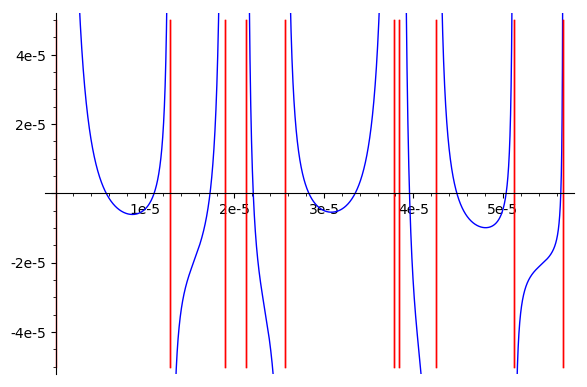

In [193]:
p = sage.plot.graphics.Graphics()
ylim = 5*10^-5
xeps = lambda_d/1024
p += plot(disp_eq_s.lhs(), xeps, disp_eq_brakes[0])
for i in range(len(disp_eq_brakes)-1):
    p += plot (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)
for i in range(len(disp_eq_brakes)):
    p += line ( [(disp_eq_brakes[i],-ylim), (disp_eq_brakes[i],ylim)], color = 'red')

p.show()

In [194]:
xeps  = lambda_d / 1024
h_lst_rec = find_root_recursive(disp_eq_s.lhs(), xeps, disp_eq_brakes[len(disp_eq_brakes)-1])
h_lst_rec.sort()
h_lst_rec

[5.66409437904893e-06,
 1.7264360312776657e-05,
 2.8318290467546946e-05,
 3.348660982922492e-05,
 4.486233365841134e-05]

In [195]:
h_lst = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
        h_lst += find_root_recursive (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i])
        print(disp_eq_brakes [i+1])
h_lst.sort()

In [196]:
h_lst 

[5.664094520987086e-06,
 1.1011477026771117e-05,
 1.7264360312785927e-05,
 2.2097204607590814e-05,
 2.8318290625578876e-05,
 3.348660993621934e-05,
 3.956521488560443e-05,
 4.486233366727796e-05,
 5.036938959956251e-05,
 5.647919129516946e-05]

In [197]:
def find_newton_root(f,x,a,b):
    df = f.diff(x)
    NewtonIt(x)=x-(f/df)(x)
    
    xn=(a+b)/2;                      # initial guess

    #print (xn)
    for i in range(10):
        xn=N(NewtonIt(xn),digits=20)

        
        #print (xn)

    return xn

In [198]:
h_lst_newton = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        h_lst_newton += [find_newton_root (disp_eq_s.lhs(),h,disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i])
        print(disp_eq_brakes [i+1])
        pass

h_lst_newton.sort()

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


In [199]:
h_lst

[5.664094520987086e-06,
 1.1011477026771117e-05,
 1.7264360312785927e-05,
 2.2097204607590814e-05,
 2.8318290625578876e-05,
 3.348660993621934e-05,
 3.956521488560443e-05,
 4.486233366727796e-05,
 5.036938959956251e-05,
 5.647919129516946e-05]

In [200]:
h_lst_newton

[5.6640945402342814810e-6,
 0.000012803986384197141294,
 0.000017264360312775874832,
 0.000018922168420975787114,
 0.000020626782081614302312,
 0.000021250940700617416658,
 0.000025607779512095247231,
 0.000028318290467547322015,
 0.000033486609831271998690,
 0.000037844312888598330186,
 0.000038411607594618269888,
 0.000039565214919760087399,
 0.000039565214919760087399,
 0.000039565214919760087399,
 0.000042501681094379278728,
 0.000051215602898369212183,
 0.000056766472822572779859,
 0.000061562524062513170617]

In [201]:
h_sol = h_lst[h_val]

In [202]:
h_sol, h_val

(5.664094520987086e-06, 0)

In [203]:
a0 = var("a0")
if E_mode:
    amplitude_variable = A_z[0]
else:
    amplitude_variable = B_z[0]

In [204]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda rh,ph,z, a0, i=i: E_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [205]:
E_phi_sol = []
for i in range(n_layers):
    E_phi_sol += [lambda rh,ph,z, a0, i=i: E_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [206]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda rh,ph,z, a0, i=i: E_z_s[i](rh,ph,z)
                .subs(digit_values)
                .subs(h == h_sol)
                .subs(omega_value)
                .subs(kappa == kappa_d1)
                .subs(c_value)
                .subs(k_values_d)
                .subs(digit_values)
                .subs(amplitude_variable == a0)
                .subs(psi_m == pi/2)
               ]

In [207]:
H_rho_sol = []
for i in range(n_layers):
    H_rho_sol += [lambda rh,ph,z, a0, i=i: H_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [208]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda rh,ph,z, a0, i=i: H_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [209]:
H_z_sol = []
for i in range(n_layers):
    H_z_sol += [lambda rh,ph,z, a0, i=i: H_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [210]:
display(Math(latex(E_rho_s [1](rho,ph,z))))

<IPython.core.display.Math object>

In [211]:
[E_rho_s [0](rho,ph,z,1) for rho in [0..int(a_val)]]

[m*mu_1*omega*(-I*(k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*B_z_0*sin(k_1*z)/(k_1*mu_1) + I*(B_z_0*k_0*cos(h*k_0) - (k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*B_z_0*cos(h*k_1)/mu_1)*cos(k_1*z)/(k_1*sin(h*k_1)))*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*rho),
 m*mu_1*omega*(-I*(k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*B_z_0*sin(k_1*z)/(k_1*mu_1) + I*(B_z_0*k_0*cos(h*k_0) - (k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*B_z_0*cos(h*k_1)/mu_1)*cos(k_1*z)/(k_1*sin(h*k_1)))*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*rho),
 m*mu_1*omega*(-I*(k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*B_z_0*sin(k_1*z)/(k_1*mu_1) + I*(B_z_0*k_0*cos(h*k_0) - (k_0*mu_1*cos(h*k_0)*cos(h*k_1) + k_1*mu_0*sin(h*k_0)*sin(h*k_1))*B_z_0*cos(h*k_1)/mu_1)*cos(k_1*z)/(k_1*sin(h*k_1)))*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*rho),
 m*mu_1*omega*(-I*(k_0*mu_1*cos(h*k_0)*cos(h*k

In [212]:
if E_mode:
    print([E_z_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]])

In [213]:
[H_rho_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]]

[-414235.135254898*(0.951441014458705*a0*cos(166027.206692757*z) - 0.364890560476315*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -414235.135254898*(0.951441014458705*a0*cos(166027.206692757*z) - 0.364890560476315*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -414235.135254898*(0.951441014458705*a0*cos(166027.206692757*z) - 0.364890560476315*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -414235.135254898*(0.951441014458705*a0*cos(166027.206692757*z) - 0.364890560476315*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -414235.135254898*(0.951441014458705*a0*cos(166027.206692757*z) - 0.364890560476315*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -414235.135254898*(0.951441014458705*a0*cos(166027.206

In [214]:
[H_phi_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [215]:
if not E_mode:
    print([H_z_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]])

[(0.364890560476315*a0*cos(166027.206692757*z) + 0.951441014458705*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), (0.364890560476315*a0*cos(166027.206692757*z) + 0.951441014458705*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), (0.364890560476315*a0*cos(166027.206692757*z) + 0.951441014458705*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), (0.364890560476315*a0*cos(166027.206692757*z) + 0.951441014458705*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), (0.364890560476315*a0*cos(166027.206692757*z) + 0.951441014458705*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), (0.364890560476315*a0*cos(166027.206692757*z) + 0.951441014458705*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), (0.364890560476315*a0*cos(166027.206692757*z) + 0.951441014458705*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), (0.364890560476315*a0*cos(166027.206692757*z) + 0.951441014458705*a0*sin(166027.206692757

In [216]:
digit_values

[m == 0,
 a == 12,
 mu_0 == 1,
 epsilon_0 == 6.09102400000000,
 sigma_0 == 9,
 mu_1 == 1,
 epsilon_1 == 2.78890000000000,
 sigma_1 == 9,
 mu_2 == 1,
 epsilon_2 == 2.21116900000000,
 sigma_2 == 9]

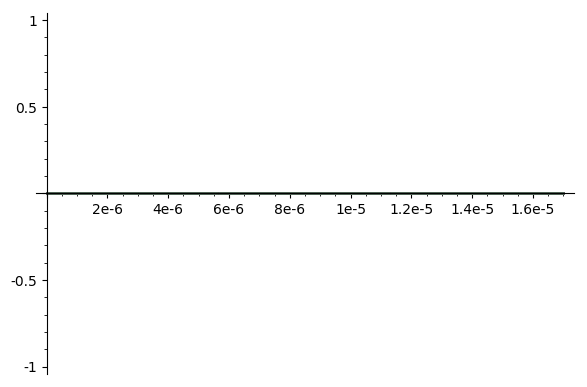

In [217]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
        
p.show ()

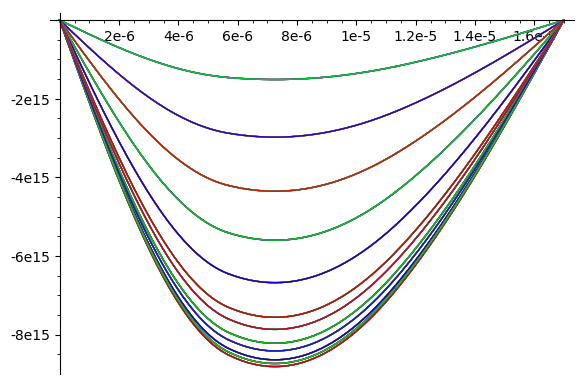

In [218]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
        
p.show ()

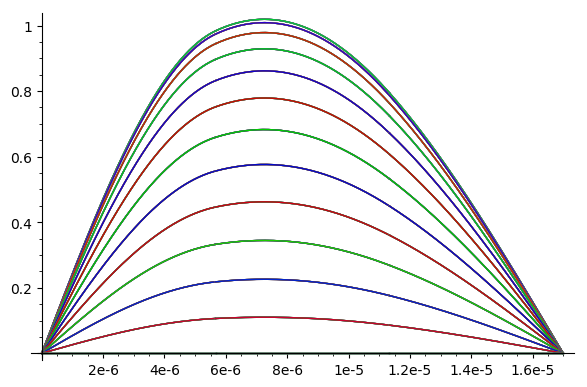

In [219]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

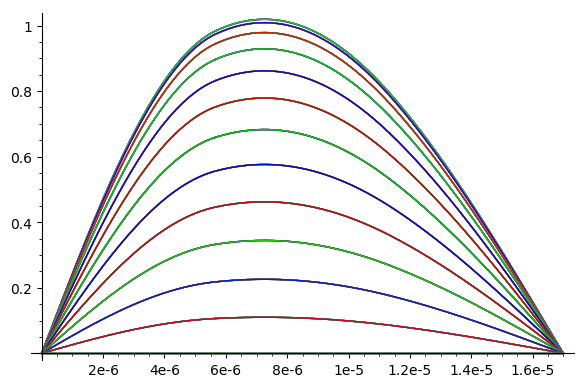

In [220]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([epsilon_d[i]*E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([mu_d[i]*H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

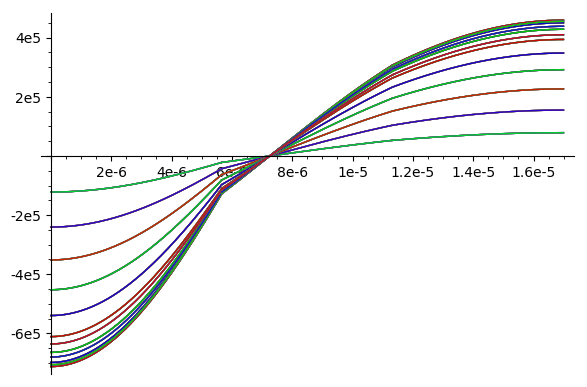

In [221]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
        
p.show ()

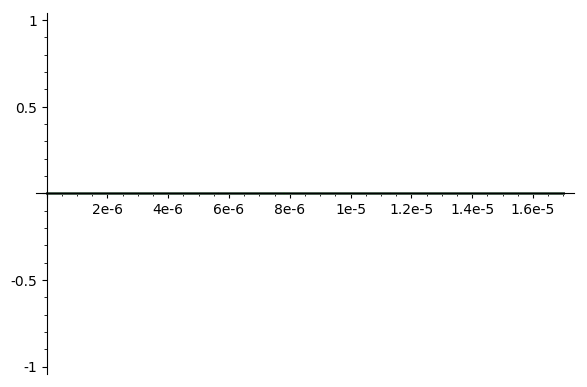

In [222]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

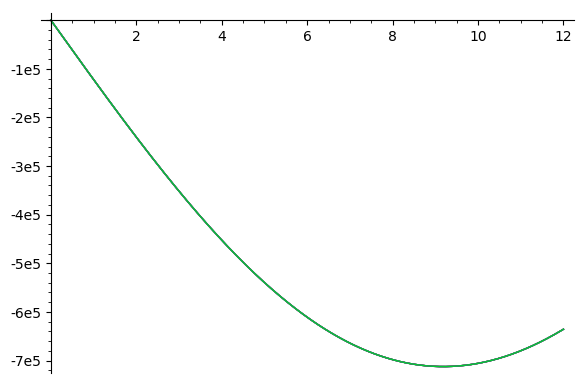

In [223]:
p = sage.plot.graphics.Graphics()

if E_mode:
    p += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    p += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
p.show ()

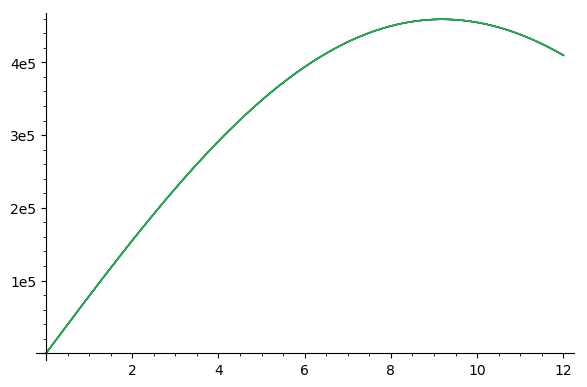

In [224]:
p = sage.plot.graphics.Graphics()

if E_mode:
    p += plot ([H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    p += plot ([H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
p.show ()

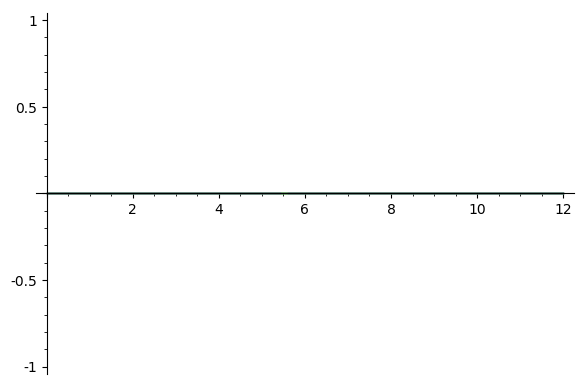

In [225]:
p = sage.plot.graphics.Graphics()

if E_mode:
    p += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    p += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
p.show ()

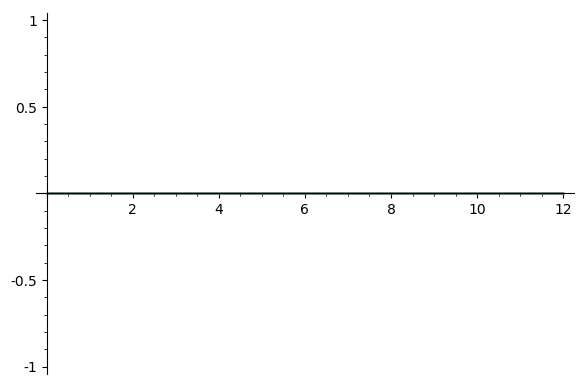

In [226]:
p = sage.plot.graphics.Graphics()

if E_mode:
    p += plot ([H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    p += plot ([H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
p.show ()

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:666: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:666: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/matplotlib/quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


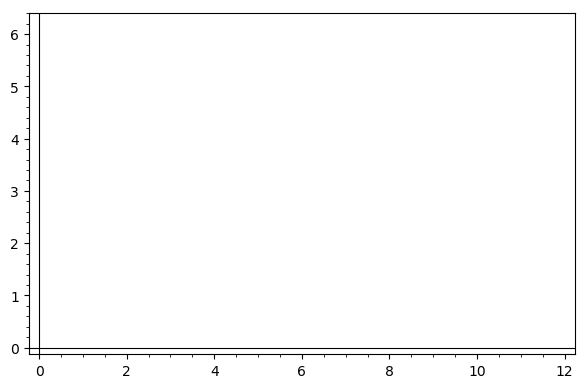

In [227]:
plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).imag_part(),
                   H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).imag_part()),
                  (rh, 0, a_val), (ph, 0, 2*pi))


In [228]:
if False:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,n_layers * h_sol,1).imag_part(),
        H_phi_sol[n_layers - 1](rho,phi,n_layers * h_sol,1).imag_part(),
        name='H1')

    print(H1.display())
    #H1.plot()

In [229]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

In [230]:
E2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho_s += [lambda rh,ph,z, i=i:" + str(
        ( (Re(E_rho_s[i](rh, ph, z))^2 +
           Im(E_rho_s[i](rh, ph, z))^2)) / (2*8*pi)
    ) + "]"))

In [231]:
E2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi_s += [lambda rh,ph,z,  i=i:" + str(
        ( (Re(E_phi_s[i](rh, ph, z))^2 +
           Im(E_phi_s[i](rh, ph, z))^2)) / (2*8*pi)
    ) + "]"))

In [232]:
E2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z_s += [lambda rh,ph,z,  i=i:" + str(
        ( (Re(E_z_s[i](rh, ph, z))^2 +
           Im(E_z_s[i](rh, ph, z))^2)) / (2*8*pi)
    ) + "]"))

In [233]:
E2_8pi_rho_s[0](rh,ph,z)

1/16*(B_z_0^2*m^2*mu_0^2*omega^2*cos(m*varphi + psi_m)^2*imag_part(bessel_J(m, kappa*rho))^2*sin(k_0*z)^2/(kappa^4*rho^2) + B_z_0^2*m^2*mu_0^2*omega^2*cos(m*varphi + psi_m)^2*real_part(bessel_J(m, kappa*rho))^2*sin(k_0*z)^2/(kappa^4*rho^2))/pi

In [234]:
E2_8pi_phi_s[0](rh,ph,z)

1/64*B_z_0^2*mu_0^2*omega^2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))^2*sin(m*varphi + psi_m)^2*sin(k_0*z)^2/(pi*kappa^2)

In [235]:
Re(E_phi_s[i](rh, ph, z))^2 + Im(E_phi_s[i](rh, ph, z))^2

1/4*(k_0*mu_1*cos(h*k_0)*cos(h*k_1)^2 - k_1*mu_0*cos(h*k_1)*sin(h*k_0)*sin(h*k_1) - k_0*mu_1*cos(h*k_0))^2*(4*cos(h*k_2)^2 - 3)^2*(cos(k_2*z)*sin(3*h*k_2) - cos(3*h*k_2)*sin(k_2*z))^2*B_z_0^2*omega^2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))^2*cos(h*k_2)^2*sin(m*varphi + psi_m)^2/(k_1^2*kappa^2*cos(3*h*k_2)^2*sin(h*k_1)^2*sin(h*k_2)^2)

In [236]:
if E_mode:
    print(E2_8pi_z_s[0](rh,ph,z))

In [237]:
E2_8pi_rho_sol = []
for i in range(n_layers):
    E2_8pi_rho_sol += [lambda rh,ph,z, a0, i=i: E2_8pi_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [238]:
E2_8pi_phi_sol = []
for i in range(n_layers):
    E2_8pi_phi_sol += [lambda rh,ph,z, a0, i=i: E2_8pi_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [239]:
E2_8pi_z_sol = []
for i in range(n_layers):
    E2_8pi_z_sol += [lambda rh,ph,z, a0, i=i: E2_8pi_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [240]:
E2_8pi_rho_sol[0](rh,ph,z, a0)

0

In [241]:
E2_8pi_phi_sol[0](rh,ph,z, a0)

(3.5017295504434856e+29)*pi*a0^2*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho))^2*sin(245362.362944843*z)^2

In [242]:
E2_8pi_z_sol[0](rh,ph,z, a0)

0

In [243]:
if E_mode:
    print(E2_8pi_z_sol[0](rh,ph,z, a0))

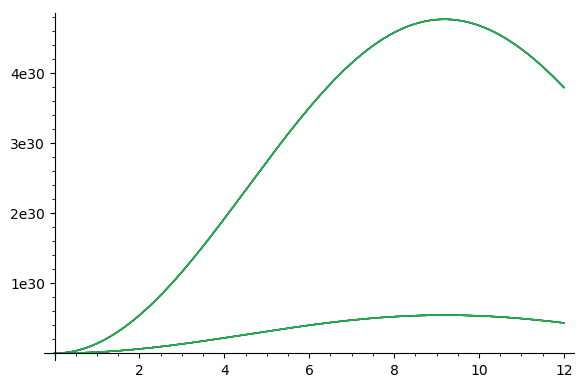

In [244]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    p += plot ([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
                (E2_8pi_rho_sol[i](rh,ph,(i+1)*h_sol,1) + 
                 E2_8pi_phi_sol[i](rh,ph,(i+1)*h_sol,1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
p.show ()

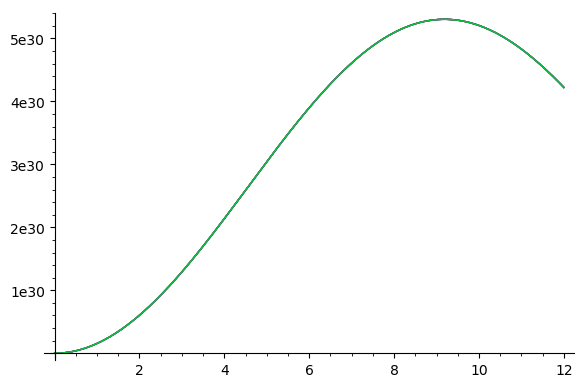

In [245]:
p = sage.plot.graphics.Graphics()

p += plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
p.show ()

In [246]:
E2_8pi_rho_sol_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh += [lambda rh,ph,z, a0, i=i: E2_8pi_rho_sol[i](rh,ph,z, a0) * rh]

In [247]:
E2_8pi_phi_sol_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh += [lambda rh,ph,z, a0, i=i: E2_8pi_phi_sol[i](rh,ph,z, a0) * rh]

In [248]:
E2_8pi_z_sol_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh += [lambda rh,ph,z, a0, i=i: E2_8pi_z_sol[i](rh,ph,z, a0) * rh]

In [249]:
E2_8pi_rho_sol_rh[0](rh,ph,z,1)

0

In [250]:
E2_8pi_phi_sol_rh[0](rh,ph,z,1)

(3.5017295504434856e+29)*pi*rho*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho))^2*sin(245362.362944843*z)^2

In [251]:
print(E2_8pi_z_sol_rh[0](rh,ph,z,1))

0


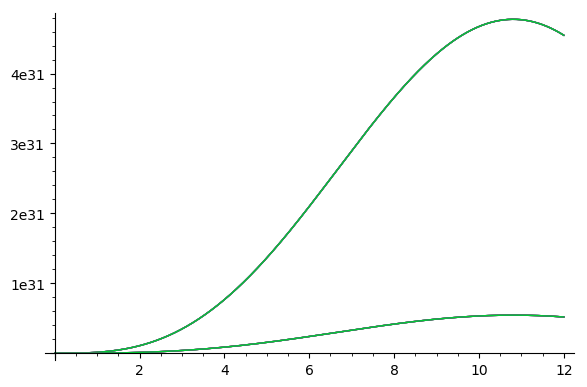

In [252]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    p += plot ([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
                (E2_8pi_rho_sol_rh[i](rh,ph,(i+1)*h_sol,1) + 
                 E2_8pi_phi_sol_rh[i](rh,ph,(i+1)*h_sol,1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
p.show ()

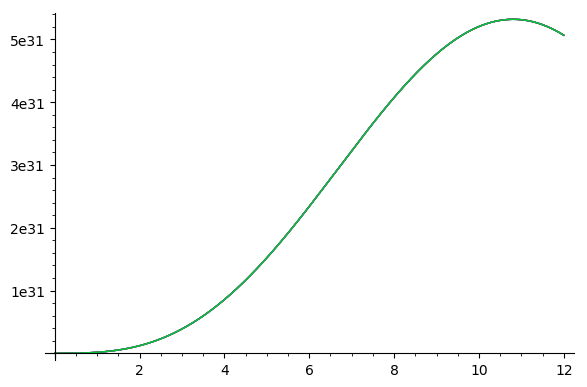

In [253]:
p = sage.plot.graphics.Graphics()

p += plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
p.show ()

In [254]:
E2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : E2_8pi_rho_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [255]:
[E2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [0..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [256]:
if 1 < n_layers:
    print([E2_8pi_rho_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [257]:
E2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : E2_8pi_phi_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [258]:
[E2_8pi_phi_sol_rh_int_ph [0](rho,h_sol, 1) for rho in [1..int(a_val)]]

[2.659133619054132e+29,
 2.0639242571896518e+30,
 6.621008112387901e+30,
 1.4606884058020495e+31,
 2.5979030254455905e+31,
 3.995280116293731e+31,
 5.510366034429235e+31,
 6.958630678257599e+31,
 8.143559632128907e+31,
 8.889992749713051e+31,
 9.075155153913464e+31,
 8.652116193033877e+31]

In [259]:
if 1 < n_layers:
    print([E2_8pi_phi_sol_rh_int_ph [1](rho,h_sol, 1) for rho in [1..int(a_val)]])

[2.659133619054131e+29, 2.0639242571896507e+30, 6.621008112387898e+30, 1.4606884058020486e+31, 2.5979030254455896e+31, 3.995280116293728e+31, 5.510366034429233e+31, 6.958630678257595e+31, 8.143559632128903e+31, 8.889992749713048e+31, 9.075155153913462e+31, 8.652116193033874e+31]


In [260]:
E2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : E2_8pi_z_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [261]:
if E_mode:
    print([E2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [0..int(a_val)]])

In [262]:
if E_mode:
    if 1 < n_layers:
        print([E2_8pi_z_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..int(a_val)]])

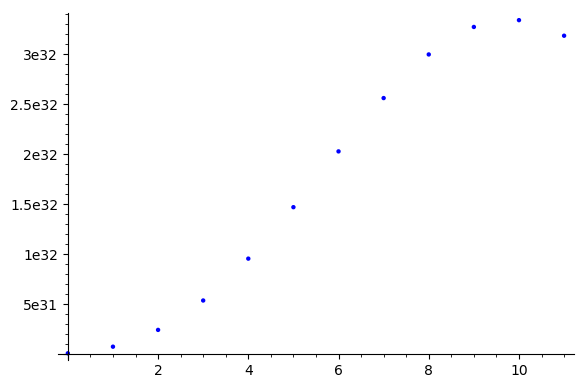

In [263]:
p = sage.plot.graphics.Graphics()

p += list_plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol_rh_int_ph[i](rho,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol_rh_int_ph[i](rho,(i+1)*h_sol,1) ) for i in range(n_layers - 1)])
            for rho in [1..int(a_val)] ])
p.show ()

In [264]:
E2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : E2_8pi_rho_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [265]:
E2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : E2_8pi_phi_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [266]:
E2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : E2_8pi_z_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [267]:
f_dielectric_surf_rho = []
for i in range(n_layers - 1):
    f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i  ](0, a_val, (i+1) * h_sol, 1)]
    #f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i+1](0, a_val, (i+1) * h_sol, 1)]

In [268]:
f_dielectric_surf_phi = []
for i in range(n_layers - 1):
    f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i  ](0, a_val, (i+1) * h_sol, 1)]
    #f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i+1](0, a_val, (i+1) * h_sol, 1)]

In [269]:
if E_mode:
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1))
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, h_sol, 1))

In [270]:
if E_mode:
    if 1 < n_layers:
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol, 1))
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1))

In [271]:
E2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [272]:
E2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [273]:
E2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [274]:
H2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho_s += [lambda rh,ph,z, i=i:" + str(
        (  Re(H_rho_s[i](rh, ph, z))^2 +
           Im(H_rho_s[i](rh, ph, z))^2 ) / (2*8*pi)
    ) + "]"))

In [275]:
H2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi_s += [lambda rh,ph,z,  i=i:" + str(
        (  Re(H_phi_s[i](rh, ph, z))^2 +
           Im(H_phi_s[i](rh, ph, z))^2 ) / (2*8*pi)
    ) + "]"))

In [276]:
H2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z_s += [lambda rh,ph,z,  i=i:" + str(
        (  Re(H_z_s[i](rh, ph, z))^2 +
           Im(H_z_s[i](rh, ph, z))^2 ) / (2*8*pi)
    ) + "]"))

In [277]:
H2_8pi_rho_s[0](rh,ph,z)

1/64*B_z_0^2*k_0^2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))^2*cos(k_0*z)^2*sin(m*varphi + psi_m)^2/(pi*kappa^2)

In [278]:
H2_8pi_phi_s[0](rh,ph,z)

1/16*(B_z_0^2*k_0^2*m^2*cos(m*varphi + psi_m)^2*cos(k_0*z)^2*imag_part(bessel_J(m, kappa*rho))^2/(kappa^4*rho^2) + B_z_0^2*k_0^2*m^2*cos(m*varphi + psi_m)^2*cos(k_0*z)^2*real_part(bessel_J(m, kappa*rho))^2/(kappa^4*rho^2))/pi

In [279]:
H2_8pi_z_s[0](rh,ph,z)

1/16*(B_z_0^2*imag_part(bessel_J(m, kappa*rho))^2*sin(m*varphi + psi_m)^2*sin(k_0*z)^2 + B_z_0^2*real_part(bessel_J(m, kappa*rho))^2*sin(m*varphi + psi_m)^2*sin(k_0*z)^2)/pi

In [280]:
H2_8pi_rho_sol = []
for i in range(n_layers):
    H2_8pi_rho_sol += [lambda rh,ph,z, a0, i=i: H2_8pi_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [281]:
H2_8pi_phi_sol = []
for i in range(n_layers):
    H2_8pi_phi_sol += [lambda rh,ph,z, a0, i=i: H2_8pi_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [282]:
H2_8pi_z_sol = []
for i in range(n_layers):
    H2_8pi_z_sol += [lambda rh,ph,z, a0, i=i: H2_8pi_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [283]:
H2_8pi_rho_sol[0](rh,ph,z, a0)

2.34223923379081e10*a0^2*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho))^2*cos(245362.362944843*z)^2/pi

In [284]:
H2_8pi_phi_sol[0](rh,ph,z, a0)

0

In [285]:
H2_8pi_z_sol[0](rh,ph,z, a0)

1/16*(a0^2*imag_part(bessel_J(0, 0.200402129807981*rho))^2*sin(245362.362944843*z)^2 + a0^2*real_part(bessel_J(0, 0.200402129807981*rho))^2*sin(245362.362944843*z)^2)/pi

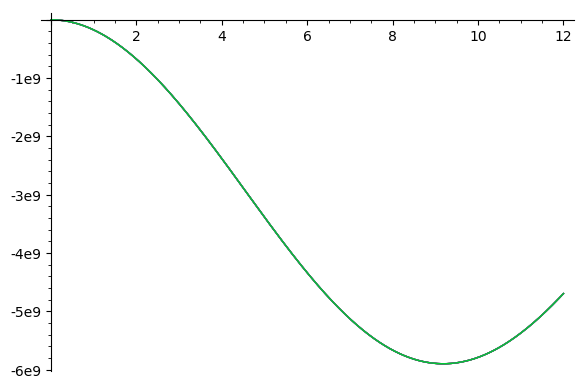

In [286]:
p = sage.plot.graphics.Graphics()

p += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,(n_layers)*h_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) ))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
p.show ()

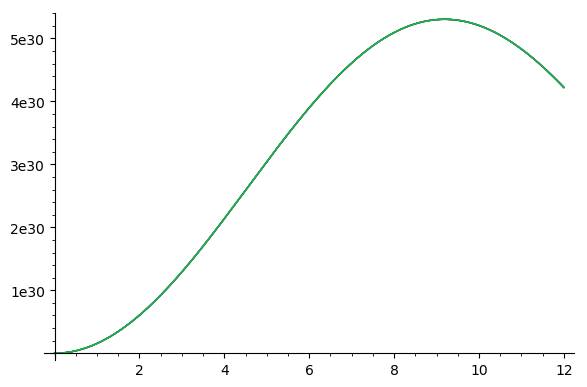

In [287]:
p = sage.plot.graphics.Graphics()

p += plot ([sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
p.show ()

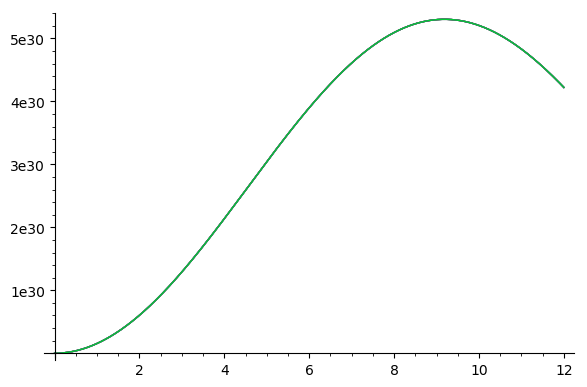

In [288]:
p = sage.plot.graphics.Graphics()

p += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,(n_layers)*h_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,(n_layers)*h_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) )
            +
            sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
p.show ()

In [289]:
H2_8pi_rho_sol_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh += [lambda rh,ph,z, a0, i=i: H2_8pi_rho_sol[i](rh,ph,z, a0) * rh]

In [290]:
H2_8pi_phi_sol_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh += [lambda rh,ph,z, a0, i=i: H2_8pi_phi_sol[i](rh,ph,z, a0) * rh]

In [291]:
H2_8pi_z_sol_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh += [lambda rh,ph,z, a0, i=i: H2_8pi_z_sol[i](rh,ph,z, a0) * rh]

In [292]:
H2_8pi_rho_sol_rh[0](rh,ph,z,1)

2.34223923379081e10*rho*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho))^2*cos(245362.362944843*z)^2/pi

In [293]:
H2_8pi_phi_sol_rh[0](rh,ph,z,1)

0

In [294]:
H2_8pi_z_sol_rh[0](rh,ph,z,1)

1/16*(imag_part(bessel_J(0, 0.200402129807981*rho))^2*sin(245362.362944843*z)^2 + real_part(bessel_J(0, 0.200402129807981*rho))^2*sin(245362.362944843*z)^2)*rho/pi

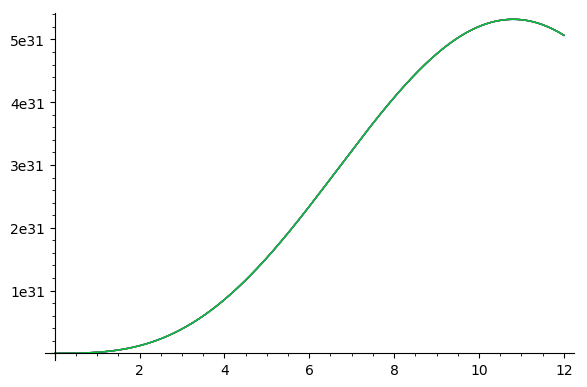

In [295]:
p = sage.plot.graphics.Graphics()

p += plot ([
            ((H2_8pi_rho_sol_rh[n_layers - 1](rh,ph,(n_layers)*h_sol,1) + 
             H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,(n_layers)*h_sol,1) +
             H2_8pi_z_sol_rh  [n_layers - 1](rh,ph,(n_layers)*h_sol,1) )
            -
            (H2_8pi_rho_sol_rh[0](rh,ph,0,1) + 
             H2_8pi_phi_sol_rh[0](rh,ph,0,1) +
             H2_8pi_z_sol_rh  [0](rh,ph,0,1) )
            +
            sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,(i+1)*h_sol,1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,(i+1)*h_sol,1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
p.show ()

In [296]:
H2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : H2_8pi_rho_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [297]:
[H2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[1862523801.8938646,
 14456242539.963861,
 46375199476.59236,
 102310275176.18471,
 181963636021.6314,
 279839428094.52625,
 385959841308.11096,
 487399925072.3544,
 570395317418.36,
 622677362895.8951,
 635646601544.4528,
 606015892951.2174]

In [298]:
if 1 < n_layers:
    print([H2_8pi_rho_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [1..int(a_val)]])

[346837594.9333241, 2692029164.532306, 8635950120.293293, 19052132242.81607, 33885113209.770298, 52111459788.66434, 71873112689.37057, 90763198629.13133, 106218529853.65897, 115954447801.75955, 118369568369.02867, 112851763069.46794]


In [299]:
H2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : H2_8pi_phi_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [300]:
[H2_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [301]:
if 1 < n_layers:
    print([H2_8pi_phi_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [1..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [302]:
H2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : H2_8pi_z_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [303]:
[H2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [304]:
if 1 < n_layers:
    print([H2_8pi_z_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [1..int(a_val)]])

[0.07738610234339532, 0.14561153327832047, 0.19687546953619878, 0.2258873227553435, 0.23063087735238322, 0.21262561329208454, 0.1766469703940336, 0.12995145612758977, 0.0811292861239826, 0.03876466634316373, 0.01011292598494502, 1.516087646363543e-31]


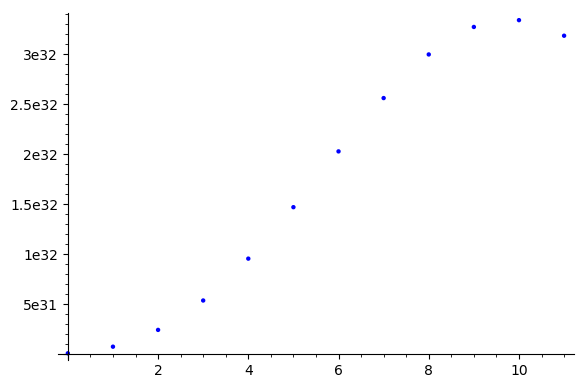

In [305]:
p = sage.plot.graphics.Graphics()

p += list_plot ([
    ((H2_8pi_rho_sol_rh_int_ph[n_layers - 1](rho,(n_layers)*h_sol,1) + 
     H2_8pi_phi_sol_rh_int_ph[n_layers - 1](rho,(n_layers)*h_sol,1) +
     H2_8pi_z_sol_rh_int_ph  [n_layers - 1](rho,(n_layers)*h_sol,1) )
    -
    (H2_8pi_rho_sol_rh_int_ph[0](rho,0,1) + 
     H2_8pi_phi_sol_rh_int_ph[0](rho,0,1) +
     H2_8pi_z_sol_rh_int_ph  [0](rho,0,1) )
    +
    sum([(epsilon[i]-epsilon[i+1]).subs(digit_values) * 
    (E2_8pi_rho_sol_rh_int_ph[i](rho,(i+1)*h_sol,1) + 
     E2_8pi_phi_sol_rh_int_ph[i](rho,(i+1)*h_sol,1) ) for i in range(n_layers - 1)]))
    for rho in [1..int(a_val)] ])
p.show ()

In [306]:
H2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : H2_8pi_rho_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [307]:
H2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : H2_8pi_phi_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [308]:
H2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : H2_8pi_z_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [309]:
f_surf_0_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_rho

3636095357707.3022

In [310]:
f_surf_0_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_phi

0.0

In [311]:
f_surf_0_z   = H2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_z

0.0

In [312]:
f_surf_1_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, n_layers*h_sol, 1)
f_surf_1_rho

1510912152456.3013

In [313]:
f_surf_1_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, n_layers*h_sol, 1)
f_surf_1_phi

0.0

In [314]:
f_surf_1_z   = H2_8pi_z_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, n_layers*h_sol, 1)
f_surf_1_z

0.0

In [315]:
surf_f_z = - (f_surf_0_rho + f_surf_0_phi + f_surf_0_z) + (f_surf_1_rho + f_surf_1_phi + f_surf_1_z)

In [316]:
surf_f_z

-2125183205251.001

In [317]:
f_dielectric_surf_rho

[0.000000000000000, 0.000000000000000]

In [318]:
f_dielectric_surf_phi

[1.71422163190835e33, 1.95797811266259e32]

In [319]:
f_dielectric_surf = 0
print(f_dielectric_surf)
for i in range(n_layers - 1):
    f_dielectric_surf += f_dielectric_surf_rho[i] + f_dielectric_surf_phi[i]
    print(f_dielectric_surf)

0
1.71422163190835e33
1.91001944317461e33


In [320]:
sum_surf_f_z = surf_f_z + f_dielectric_surf

In [321]:
sum_surf_f_z

1.91001944317461e33

In [322]:
H2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [323]:
H2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [324]:
H2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [325]:
#ED_8pi_rho_0 = epsilon[0].subs(digit_values) * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [326]:
#ED_8pi_rho_1 = epsilon[1].subs(digit_values) * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [327]:
ED_8pi_rho = []
for i in range(n_layers):
    ED_8pi_rho += [epsilon[i].subs(digit_values) * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [328]:
#ED_8pi_rho_0 + ED_8pi_rho_1
sum(ED_8pi_rho)

0.000000000000000

In [329]:
#ED_8pi_phi_0 = epsilon[0].subs(digit_values) * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [330]:
#ED_8pi_phi_1 = epsilon[1].subs(digit_values) * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [331]:
ED_8pi_phi = []
for i in range(n_layers):
    ED_8pi_phi += [epsilon[i].subs(digit_values) * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [332]:
#ED_8pi_phi_0 + ED_8pi_phi_1
sum(ED_8pi_phi)

1.75010255517739e28

In [333]:
#ED_8pi_z_0 = epsilon[0].subs(digit_values) * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1) if E_mode else 0

In [334]:
#ED_8pi_z_1 = epsilon[1].subs(digit_values) * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1) if E_mode else 0

In [335]:
ED_8pi_z = []
for i in range(n_layers):
    ED_8pi_z += [epsilon[i].subs(digit_values) * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [336]:
#ED_8pi_z_0 + ED_8pi_z_1
sum(ED_8pi_z)

0.000000000000000

In [337]:
#H2_8pi_rho_0 = H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [338]:
#H2_8pi_rho_1 = H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [339]:
HB_8pi_rho = []
for i in range(n_layers):
    HB_8pi_rho += [mu[i].subs(digit_values) * H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [340]:
#H2_8pi_rho_0 + H2_8pi_rho_1
sum(HB_8pi_rho)

19472517.193494454

In [341]:
#H2_8pi_phi_0 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [342]:
#H2_8pi_phi_1 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [343]:
HB_8pi_phi = []
for i in range(n_layers):
    HB_8pi_phi += [mu[i].subs(digit_values) * H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [344]:
#H2_8pi_phi_0 + H2_8pi_phi_1
sum(HB_8pi_phi)

0.0

In [345]:
#H2_8pi_z_0 = H2_8pi_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [346]:
#H2_8pi_z_1 = H2_8pi_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [347]:
HB_8pi_z = []
for i in range(n_layers):
    HB_8pi_z += [mu[i].subs(digit_values) * H2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [348]:
#H2_8pi_z_0 + H2_8pi_z_1
sum(HB_8pi_z)

2.193497291638044e-05

In [349]:
#H2_8pi_phi_0 + H2_8pi_phi_1

In [350]:
#ED_8pi_rho_0 + ED_8pi_rho_1

In [351]:
#ED_8pi_z_0 + ED_8pi_z_1

In [352]:
#ED_8pi_rho_0 + ED_8pi_rho_1 + ED_8pi_z_0 + ED_8pi_z_1

In [353]:
field_energy = sum(HB_8pi_rho) + sum(HB_8pi_phi) + sum(HB_8pi_z) \
             + sum(ED_8pi_rho) + sum(ED_8pi_phi) + sum(ED_8pi_z)
field_energy

1.75010255517739e28

In [354]:
# E x H = (-E_z(rh, ph, z)*H_phi(rh, ph, z) + E_phi(rh, ph, z)*H_z(rh, ph, z)) e_rh 
#       + ( E_z(rh, ph, z)*H_rho(rh, ph, z) - E_rho(rh, ph, z)*H_z(rh, ph, z)) e_ph
#       + (E_rho(rh, ph, z)*H_phi(rh, ph, z) - E_phi(rh, ph, z)*H_rho(rh, ph, z)) e_z

In [355]:
# Abraham force
# Minkovsky form without dissipation
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (epsilon * mu - 1) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re(E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re(E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * E_rh) * Re(H_ph) + Im(-I*omega * E_rh) * Im(H_ph) 
#        - Re(-I*omega * E_ph) * Re(H_rh) - Im(-I*omega * E_ph) * Im(H_rh)) +
#         (Re(E_rh) * Re(-I*omega * H_ph) + Im(E_rh) * Im(-I*omega * H_ph)
#        - Re(E_ph) * Re(-I*omega * H_rh) - Im(E_ph) * Im(-I*omega * H_rh)) 
#       )


In [356]:
Abraham_Minkovsky_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z += [lambda rh,ph,z,  i=i: " + str(
         (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho[i](rh, ph, z)) * Re(H_phi[i](rh, ph, z)) + Im(-I*omega * E_rho[i](rh, ph, z)) * Im(H_phi[i](rh, ph, z)) 
        - Re(-I*omega * E_phi[i](rh, ph, z)) * Re(H_rho[i](rh, ph, z)) - Im(-I*omega * E_phi[i](rh, ph, z)) * Im(H_rho[i](rh, ph, z)))
        +(Re(E_rho[i](rh, ph, z)) * Re(-I*omega * H_phi[i](rh, ph, z)) + Im(E_rho[i](rh, ph, z)) * Im(-I*omega * H_phi[i](rh, ph, z))
        - Re(E_phi[i](rh, ph, z)) * Re(-I*omega * H_rho[i](rh, ph, z)) - Im(E_phi[i](rh, ph, z)) * Im(-I*omega * H_rho[i](rh, ph, z))) 
        )
    ) + "]"))

In [357]:
display(Math(latex(Abraham_Minkovsky_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [358]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [359]:
Abraham_Minkovsky_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z_s += [lambda rh,ph,z,  i=i: " + str(
        (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho_s[i](rh, ph, z)) * Re(H_phi_s[i](rh, ph, z)) + Im(-I*omega * E_rho_s[i](rh, ph, z)) * Im(H_phi_s[i](rh, ph, z)) 
        - Re(-I*omega * E_phi_s[i](rh, ph, z)) * Re(H_rho_s[i](rh, ph, z)) - Im(-I*omega * E_phi_s[i](rh, ph, z)) * Im(H_rho_s[i](rh, ph, z)))
        +(Re(E_rho_s[i](rh, ph, z)) * Re(-I*omega * H_phi_s[i](rh, ph, z)) + Im(E_rho_s[i](rh, ph, z)) * Im(-I*omega * H_phi_s[i](rh, ph, z))
        - Re(E_phi_s[i](rh, ph, z)) * Re(-I*omega * H_rho_s[i](rh, ph, z)) - Im(E_phi_s[i](rh, ph, z)) * Im(-I*omega * H_rho_s[i](rh, ph, z))) 
        )
    ) + "]"))

In [360]:
display(Math(latex(Abraham_Minkovsky_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [361]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [362]:
i = 0
display(Math(latex(
(Re(-I*omega * E_rho[i](rh, ph, z)) * Re(H_phi[i](rh, ph, z)) + Im(-I*omega * E_rho[i](rh, ph, z)) * Im(H_phi[i](rh, ph, z)) 
- Re(-I*omega * E_phi[i](rh, ph, z)) * Re(H_rho[i](rh, ph, z)) - Im(-I*omega * E_phi[i](rh, ph, z)) * Im(H_rho[i](rh, ph, z)))
+(Re(E_rho[i](rh, ph, z)) * Re(-I*omega * H_phi[i](rh, ph, z)) + Im(E_rho[i](rh, ph, z)) * Im(-I*omega * H_phi[i](rh, ph, z))
- Re(E_phi[i](rh, ph, z)) * Re(-I*omega * H_rho[i](rh, ph, z)) - Im(E_phi[i](rh, ph, z)) * Im(-I*omega * H_rho[i](rh, ph, z))) 
)))

<IPython.core.display.Math object>

In [363]:
# Abraham force
# Abraham form with dissipation
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E x H]).diff(t)
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (mu) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re((epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (mu) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(H_ph) + Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(H_ph) 
#        - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(H_rh) - Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(H_rh)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(-I*omega * H_ph) + Im((epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(-I*omega * H_ph)
#        - Re((epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(-I*omega * H_rh) - Im((epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(-I*omega * H_rh)) 
#       )


In [364]:
Abraham_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z += [lambda rh,ph,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Re(H_phi[i](rh, ph, z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Im(H_phi[i](rh, ph, z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Re(H_rho[i](rh, ph, z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Im(H_rho[i](rh, ph, z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Re(-I*omega * H_phi[i](rh, ph, z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Im(-I*omega * H_phi[i](rh, ph, z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Re(-I*omega * H_rho[i](rh, ph, z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Im(-I*omega * H_rho[i](rh, ph, z))) 
        )
    ) + "]"))

In [365]:
display(Math(latex(Abraham_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [366]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [367]:
Abraham_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z_s += [lambda rh,ph,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](rh, ph, z)) * Re(H_phi_s[i](rh, ph, z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](rh, ph, z)) * Im(H_phi_s[i](rh, ph, z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](rh, ph, z)) * Re(H_rho_s[i](rh, ph, z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](rh, ph, z)) * Im(H_rho_s[i](rh, ph, z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](rh, ph, z)) * Re(-I*omega * H_phi_s[i](rh, ph, z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](rh, ph, z)) * Im(-I*omega * H_phi_s[i](rh, ph, z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](rh, ph, z)) * Re(-I*omega * H_rho_s[i](rh, ph, z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](rh, ph, z)) * Im(-I*omega * H_rho_s[i](rh, ph, z))) 
        )
    ) + "]"))

In [368]:
display(Math(latex(Abraham_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [369]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [370]:
i = 0
display(Math(latex(
 (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Re(H_phi[i](rh, ph, z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Im(H_phi[i](rh, ph, z)) 
- Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Re(H_rho[i](rh, ph, z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Im(H_rho[i](rh, ph, z)))
+(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Re(-I*omega * H_phi[i](rh, ph, z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](rh, ph, z)) * Im(-I*omega * H_phi[i](rh, ph, z))
- Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Re(-I*omega * H_rho[i](rh, ph, z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](rh, ph, z)) * Im(-I*omega * H_rho[i](rh, ph, z))) 
)))

<IPython.core.display.Math object>

In [371]:
calc_Abraham_force = False

In [372]:
Abraham_f_z_sol = []
for i in range(n_layers):
    Abraham_f_z_sol += [lambda rh,ph,z, a0, i=i: Abraham_f_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [373]:
#[Abraham_f_z_sol [0](rho,ph,z,a0) for rho in [0..int(a_val)]]

In [374]:
#[Abraham_f_z_sol [1](rho,ph,z,a0) for rho in [0..int(a_val)]]

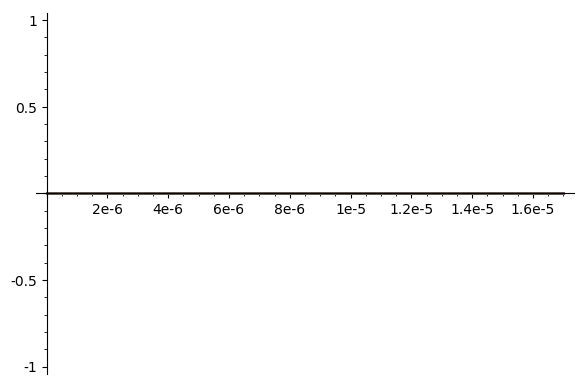

In [375]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

In [376]:
Abraham_f_z_sol_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh += [lambda rh,ph,z, a0, i=i: Abraham_f_z_sol[i](rh,ph,z, a0) * rh]

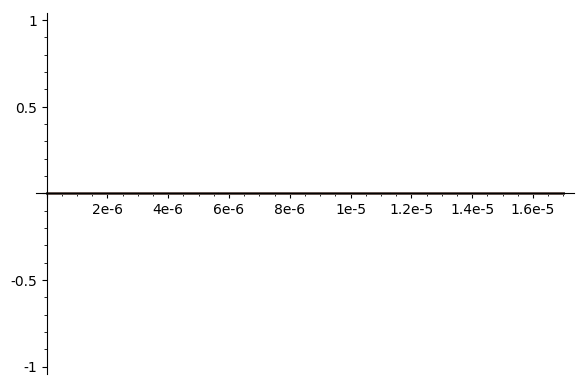

In [377]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([Abraham_f_z_sol_rh[i](rh,ph,z, 1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

In [378]:
Abraham_f_z_sol_rh_int_ph = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : Abraham_f_z_sol_rh[i](rh,ph,z,a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [379]:
#[Abraham_f_z_sol_rh_int_ph [0](rho,h_sol/2, 1) for rho in [1..int(a_val)
#                                                          ]]

In [380]:
Abraham_f_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : Abraham_f_z_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [381]:
#Abraham_f_z_sol_rh_int_ph_int_rh [0](0,a_val,h_sol/2, 1)

In [382]:
#[Abraham_f_z_sol_rh_int_ph_int_rh [0](0,a_val, z, 1) for z in [
#    0,        1*h_sol/10, 2*h_sol/10, 3*h_sol/10, 4*h_sol/10, 5*h_sol/10, 
#              6*h_sol/10, 7*h_sol/10, 8*h_sol/10, 9*h_sol/10, h_sol
#]]

In [383]:
#[Abraham_f_z_sol_rh_int_ph_int_rh [1](0,a_val, z, 1) for z in [
#    h_sol,    11*h_sol/10, 12*h_sol/10, 13*h_sol/10, 14*h_sol/10, 15*h_sol/10, 
#              16*h_sol/10, 17*h_sol/10, 18*h_sol/10, 19*h_sol/10, 2*h_sol
#]]

In [384]:
Abraham_f_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : Abraham_f_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [385]:
if calc_Abraham_force:
    Abraham_f_z = []
    for i in range(n_layers):
        Abraham_f_z += [Abraham_f_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, i * h_sol, (i+1) * h_sol, 1)]

In [386]:
if calc_Abraham_force:
    print(Abraham_f_z)

In [387]:
if calc_Abraham_force:
    print(sum(Abraham_f_z))

In [388]:
#Abraham_f_z_0_10 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 10)

In [389]:
#Abraham_f_z_1_10 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 10)

In [390]:
#Abraham_f_z_0_10

In [391]:
#Abraham_f_z_1_10

In [392]:
#Abraham_f_z_0_10 + Abraham_f_z_1_10

In [393]:
#Abraham_f_z_0 + Abraham_f_z_1

In [394]:
sum_f_z = sum_surf_f_z
if calc_Abraham_force:
    sum_f_z += sum(Abraham_f_z)

In [395]:
sum_f_z

1.91001944317461e33

In [396]:
#sum_f_z_10 = surf_f_z_10 + Abraham_f_z_0_10 + Abraham_f_z_1_10

In [397]:
#sum_f_z_10

In [398]:
sum_f_z / (field_energy)

109137.572396779

In [399]:
S = pi.n() * a_val^2
S

452.389342116930

In [400]:
V = n_layers * h_sol * S
V

0.00768712798211237

In [413]:
h_sol

5.664094520987086e-06

In [401]:
# мкм
h_sol*10*1000 

0.056640945209870855

In [402]:
field_energy

1.75010255517739e28

In [403]:
# эрг / куб см
(field_energy)/V

2.27666634307352e30

In [404]:
# волоконная оптика 1 мВт / 9 мкм
# 10^4 эрг в сек / 0.0009 см
w = (10^4 /(pi.n()*0.00045^2*c)).subs(c_value)
w # эрг в куб см

0.524329625568014

In [405]:
# дин
F_z = sum_f_z / (field_energy) * w
F_z

57224.0624702053

In [406]:
# Ньютон
F_z / 10^5

0.572240624702053

In [407]:
# gramm
F_z / 10^5 *101

57.7963030949074

In [408]:
# Толщина серебряного слоя для всех зеркал должна быть не менее 0,15 мкм
# вес одной ячейки
m_of_Layer_gramm = V/2 * 3.95 + V/2 * 4.23 + V/2 * 10.49
m_of_Layer_gramm

0.0717593397130190

In [409]:
omega_value[0].rhs().n()

2.98046134067856e15

In [415]:
# число ячеек в сантиметре
nLayers_per_sm = 1/(15e-06 + n_layers*h_sol)
nLayers_per_sm

31257.5374006043

In [411]:
# вес сантиметрово
m_of_Layer_gramm * nLayers_per_sm / 1000

4.22305450866154

In [414]:
# кг / см толщины
1.0/(15e-06 + n_layers*h_sol) * F_z / 10^5 *101/1000

1806.57010560573